In [185]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


In [175]:
df = pd.read_csv('./data/states.csv')
df.date = pd.to_datetime(df.date, yearfirst = True, format = '%Y%m%d')
df.date = df.date.dt.strftime('%m/%d')
df.sort_values('date',inplace=True)
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
5784  01/22    WA       1.0       NaN      NaN                    NaN   
5783  01/23    WA       1.0       NaN      NaN                    NaN   
5782  01/24    WA       1.0       NaN      NaN                    NaN   
5781  01/25    WA       1.0       NaN      NaN                    NaN   
5780  01/26    WA       1.0       NaN      NaN                    NaN   

      hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
5784                     NaN             NaN              NaN   
5783                     NaN             NaN              NaN   
5782                     NaN             NaN              NaN   
5781                     NaN             NaN              NaN   
5780                     NaN             NaN              NaN   

      onVentilatorCurrently  ...  posNeg  deathIncrease hospitalizedIncrease  \
5784                    NaN  ...       1              0                    0   
5783                    NaN  ...       1              0                    0   
5782                    NaN  ...       1              0                    0   
5781                    NaN  ...       1              0                    0   
5780                    NaN  ...       1              0                    0   

                                          hash commercialScore  \
5784  2d109d8ba4c74e86fa7202b7c9f26c7617945c58               0   
5783  7ed011fe93129bbc13213e7028e7e1e299d67691               0   
5782  488430e6f0d933476ca2120fe0ee2ecf4aac5b94               0   
5781  4a8a13ff65ef1f0bb991324d98609c765c5b5849               0   
5780  5372bd69fec11b6097c548b149e4e79fca8d21d2               0   

     negativeRegularScore  negativeScore  positiveScore score  grade  
5784                    0              0              0     0    NaN  
5783                    0              0              0     0    NaN  
5782                    0              0              0     0    NaN  
5781                    0              0              0     0    NaN  
5780                    0              0              0     0    NaN  

[5 rows x 39 columns]

In [154]:
population_dict = {}
with open('./data/populations.tsv','r') as f:
    for line in f:
        line = line.strip().split('\t')
        population_dict[line[0]] = int(line[1])

In [171]:
df[df.state=='CA'].totalTestResults.diff()/39e6*1000

5723         NaN
5699    0.000000
5665    0.000179
5616    0.000231
5566    0.000487
          ...   
229     1.656692
173     1.593205
117     1.989821
61      1.697077
5       1.783923
Name: totalTestResults, Length: 105, dtype: float64

In [55]:
df['deltapos'] = df.positive.diff()
df['deltaneg'] = df.negative.diff()
df['deltapos.rolling'] = df.deltapos.rolling(7).mean()
df['deltatest'] = df.total.diff()
df['deltatest.rolling'] = df.deltatest.rolling(7).mean()

In [59]:
fig = make_subplots()
fig.add_trace(go.Scatter(x = df.date, y = df['deltapos.rolling']/df['deltatest.rolling']))
fig.write_html('first_figure.html', auto_open=True)

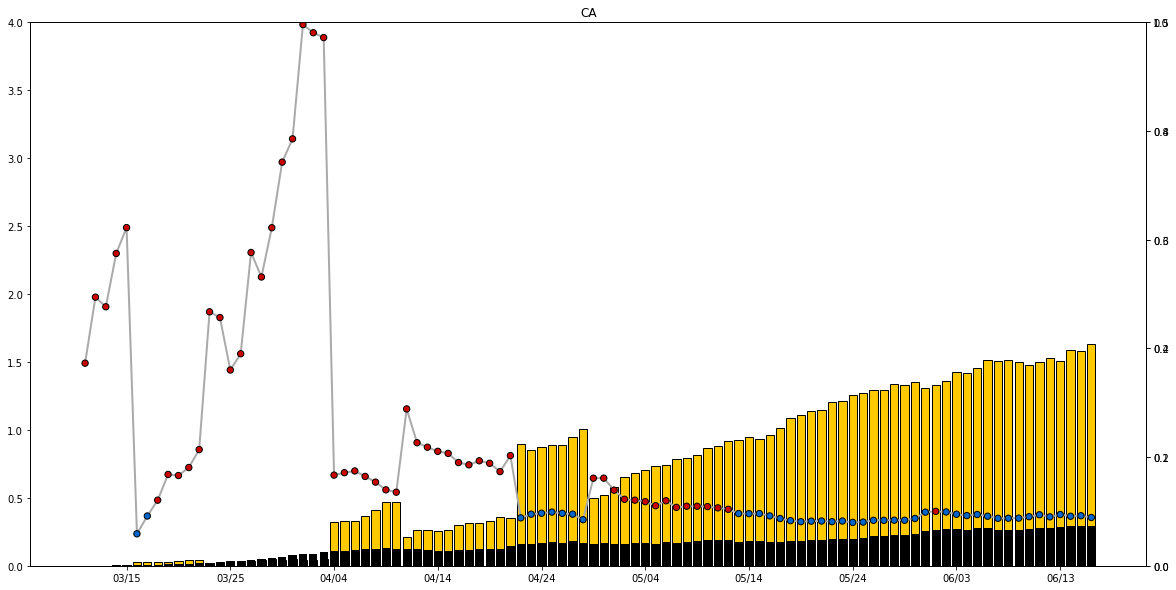

In [216]:
fig,ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx()
ax3 = ax.twinx()
state = 'CA'
state_pop = population_dict[state]

tmp = df.loc[df.state==state,:].copy()
tmp.loc[:,'deltapos'] = tmp['positive'].diff()
tmp.loc[:,'deltapos.rolling'] = tmp['deltapos'].rolling(7).mean()
tmp.loc[:,'deltatest'] = tmp['totalTestResults'].diff()
tmp.loc[:,'deltatest.rolling'] = tmp['deltatest'].rolling(7).mean()
rate = tmp['deltapos.rolling']/tmp['deltatest.rolling']
ax2.plot(tmp.date, rate , lw = 2, color = '#aaaaaa',zorder = 1)
ax2.scatter(tmp.date, rate , color = ['#0066cc' if x<0.05 else '#cc0000' for x in rate], s = 40, zorder = 3, edgecolor = 'k')
ax2.set_ylim([0,0.5])
ax3.bar(tmp.date,tmp['deltapos.rolling']/state_pop*1000,color = 'k',zorder = 3)
ax.bar(tmp.date,tmp['deltatest.rolling']/state_pop*1000, color = '#FFC900', edgecolor = 'k')

ax3.set_ylim([0,1])
ax.set_title(state)
ax.set_ylim([0,4])
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 10))
#plt.savefig('wip.png')
plt.show()

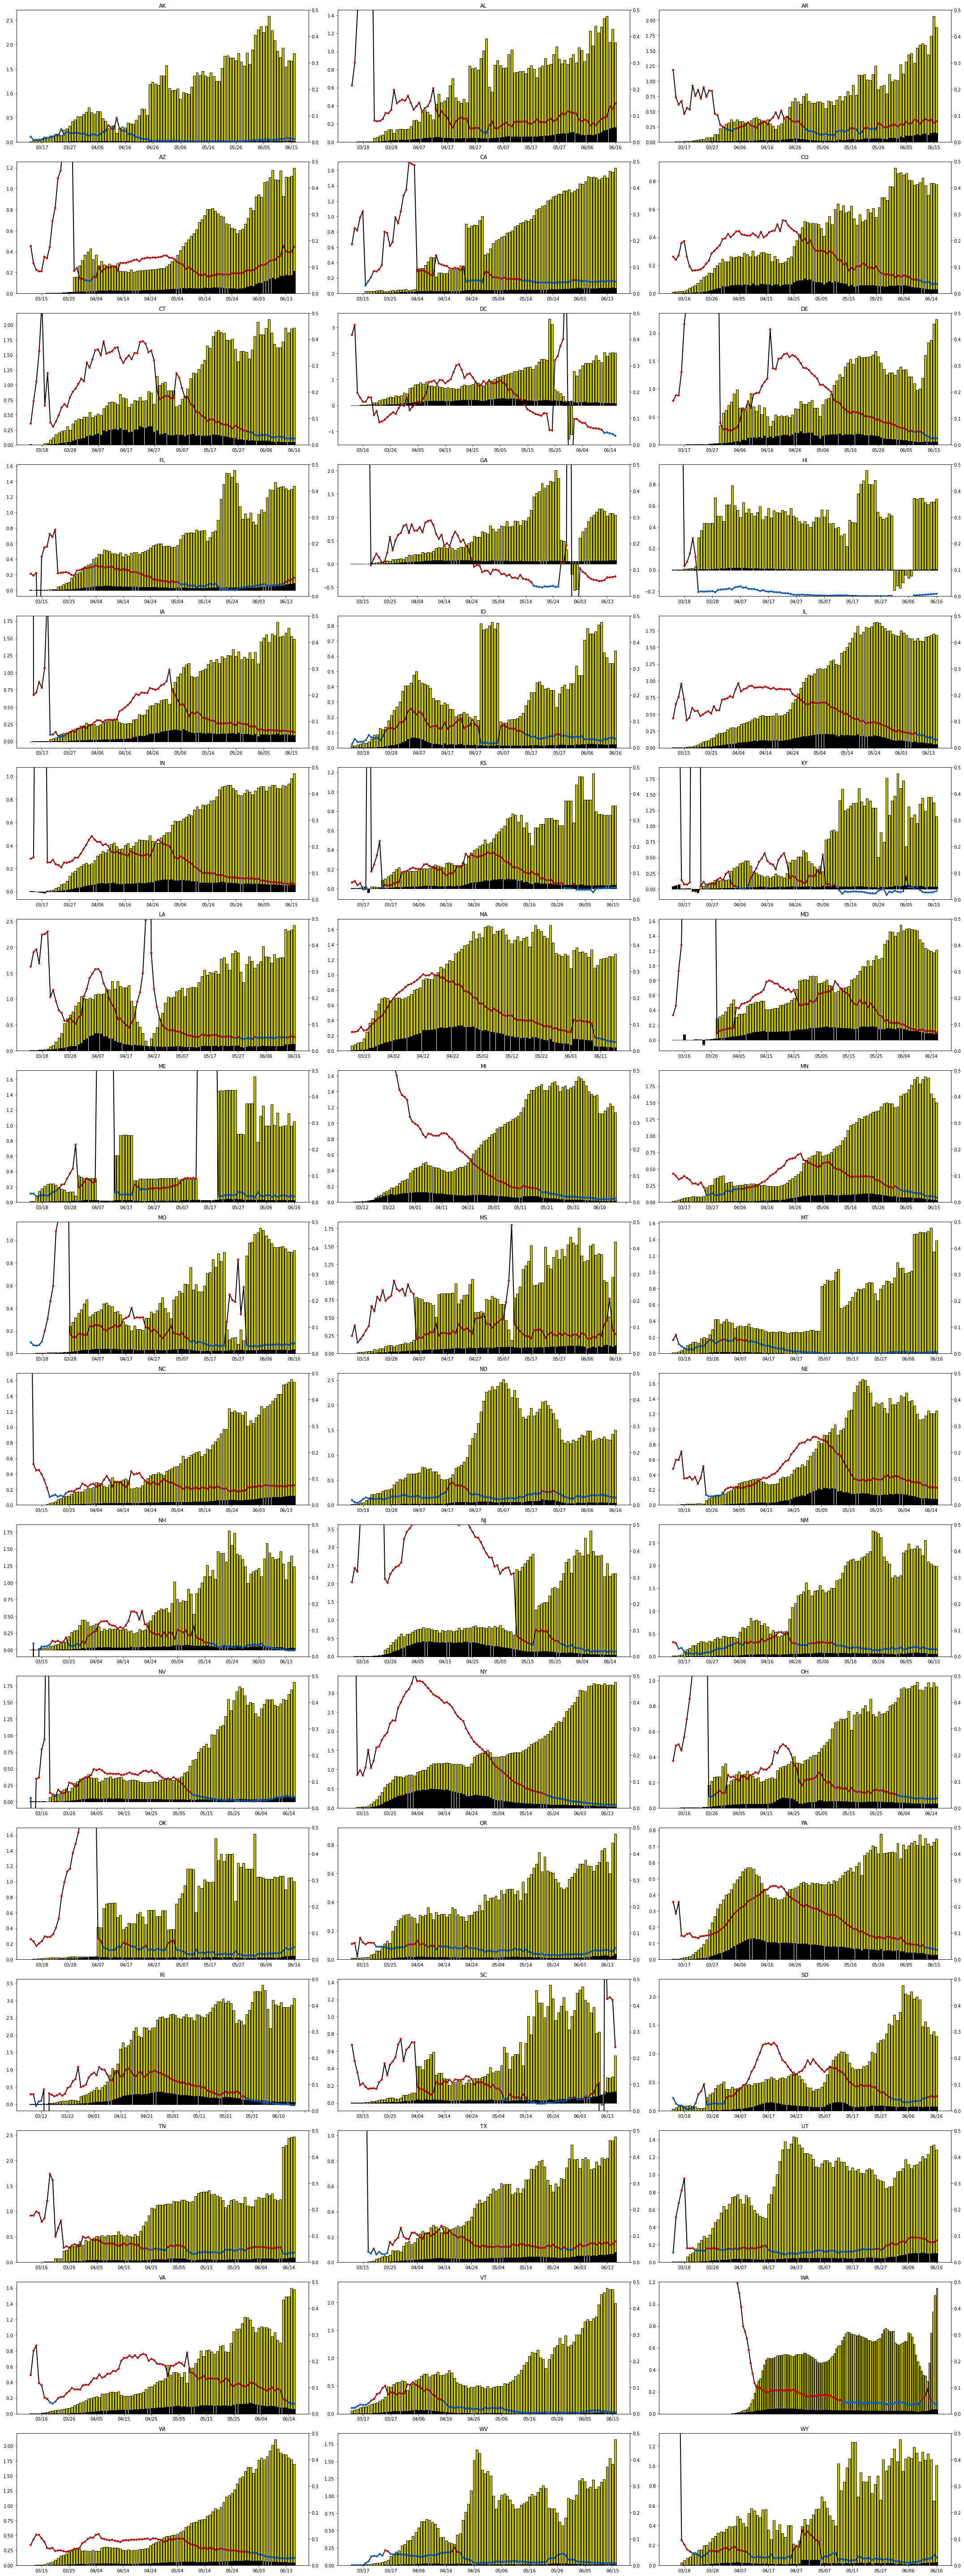

In [217]:
fig,ax = plt.subplots(17,3,figsize = (30,80))
ax = ax.flatten()

states = sorted([x for x in df.state.unique() if x not in ['PR','GU','AS','MP','VI']])
for i,state in enumerate(states):
    ax2 = ax[i].twinx()
    state_pop = population_dict[state]
    
    tmp = df.loc[df.state==state,:].copy()
    tmp.loc[:,'deltapos'] = tmp['positive'].diff()
    tmp.loc[:,'deltapos.rolling'] = tmp['deltapos'].rolling(7).mean()
    tmp.loc[:,'deltatest'] = tmp['totalTestResults'].diff()
    tmp.loc[:,'deltatest.rolling'] = tmp['deltatest'].rolling(7).mean()
    rate = tmp['deltapos.rolling']/tmp['deltatest.rolling']
    ax2.plot(tmp.date, rate , lw = 2, color = 'k',zorder = 1)
    ax2.scatter(tmp.date, rate , color = ['#0066cc' if x<0.05 else '#cc0000' for x in rate], s = 15, zorder = 3)
    ax2.set_ylim([0,0.5])
    ax[i].bar(tmp.date,tmp['deltapos.rolling']/state_pop*1000,color = 'k',zorder = 3)
    ax[i].bar(tmp.date,tmp['deltatest.rolling']/state_pop*1000, color = 'y', edgecolor = 'k')

    ax[i].set_title(state)
for a in ax:
    #a.set_ylim([0,4])
    a.xaxis.set_major_locator(mdates.DayLocator(interval = 10))
plt.tight_layout()
#plt.savefig('wip.png')
plt.show()

# Plotly old code, maybe revisit for interactive plots

/home/hoooman/covid_plots/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/hoooman/covid_plots/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/hoooman/covid_plots/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

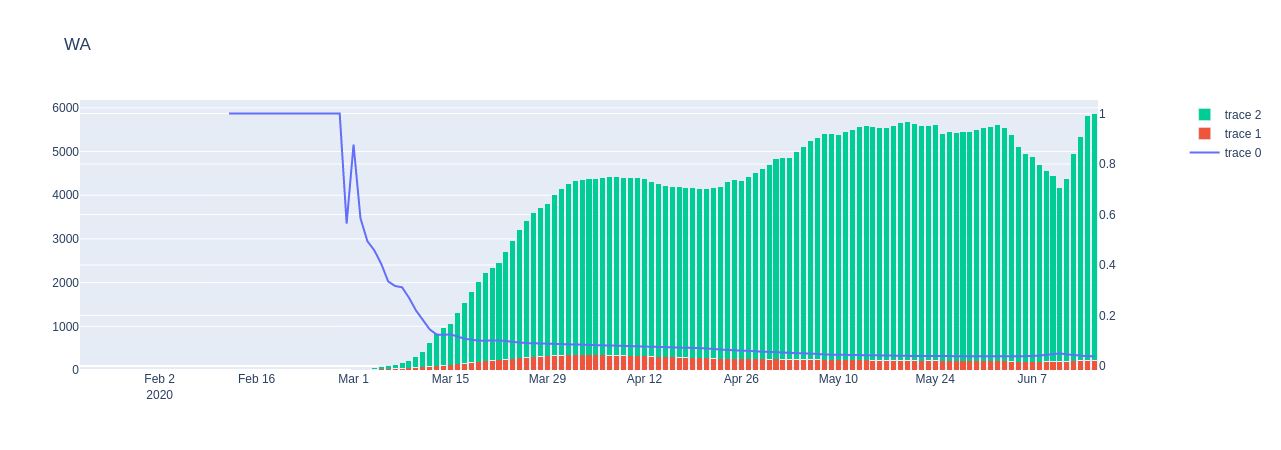

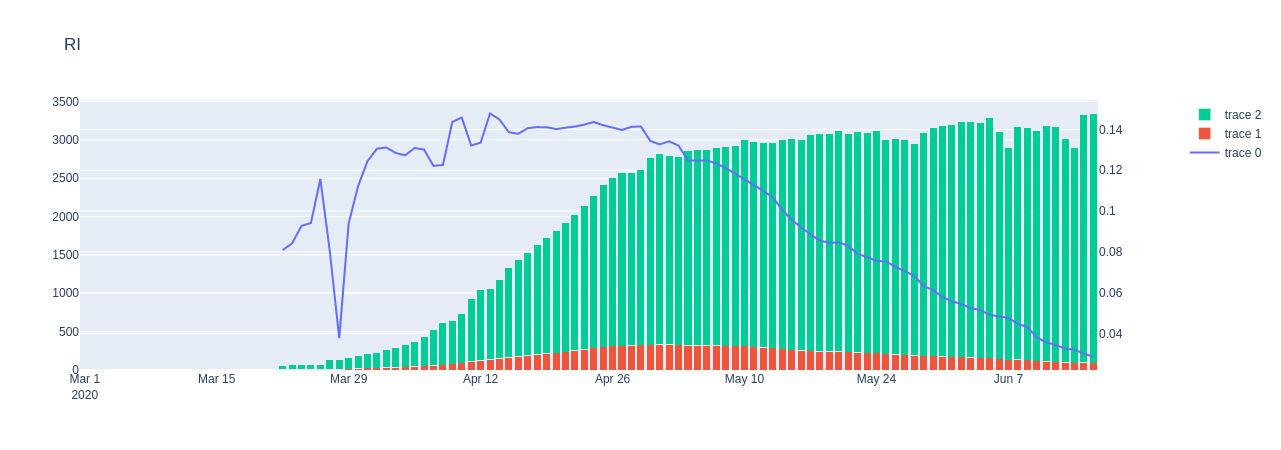

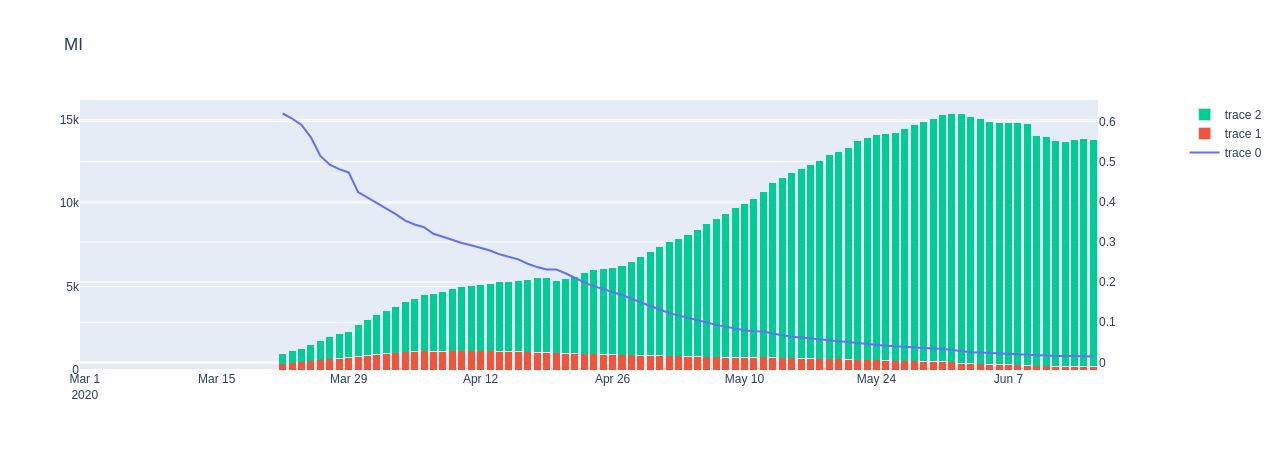

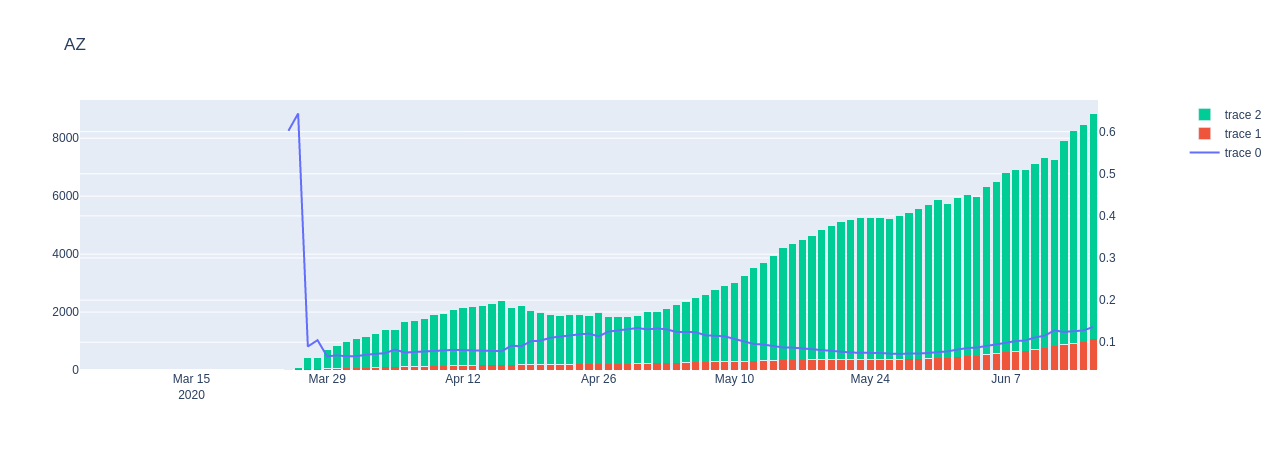

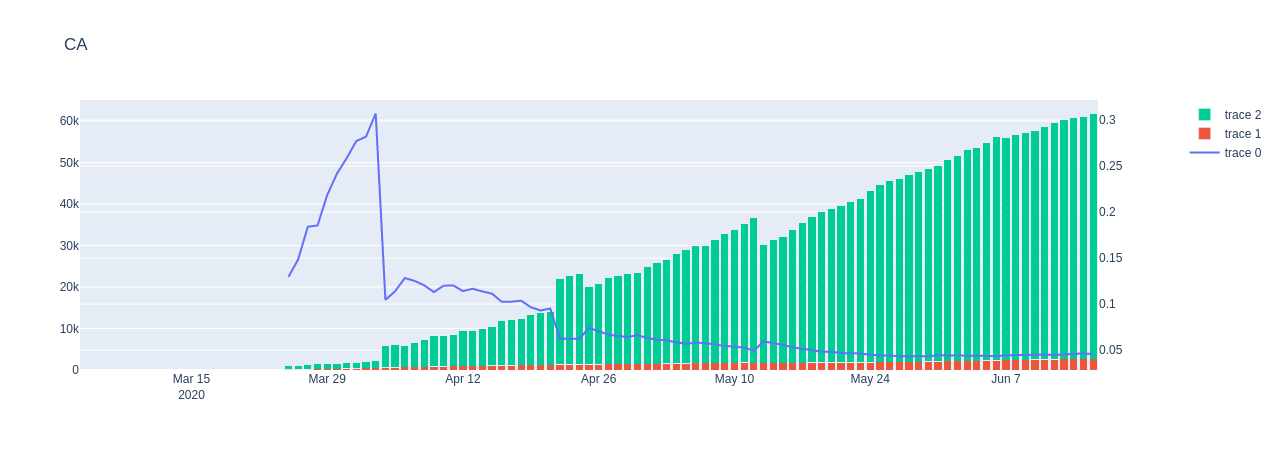

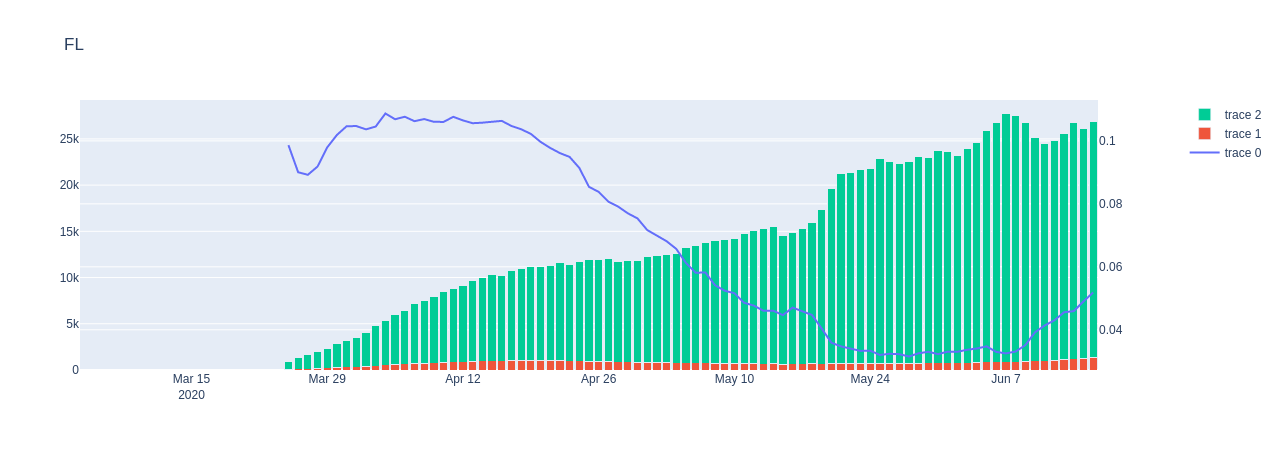

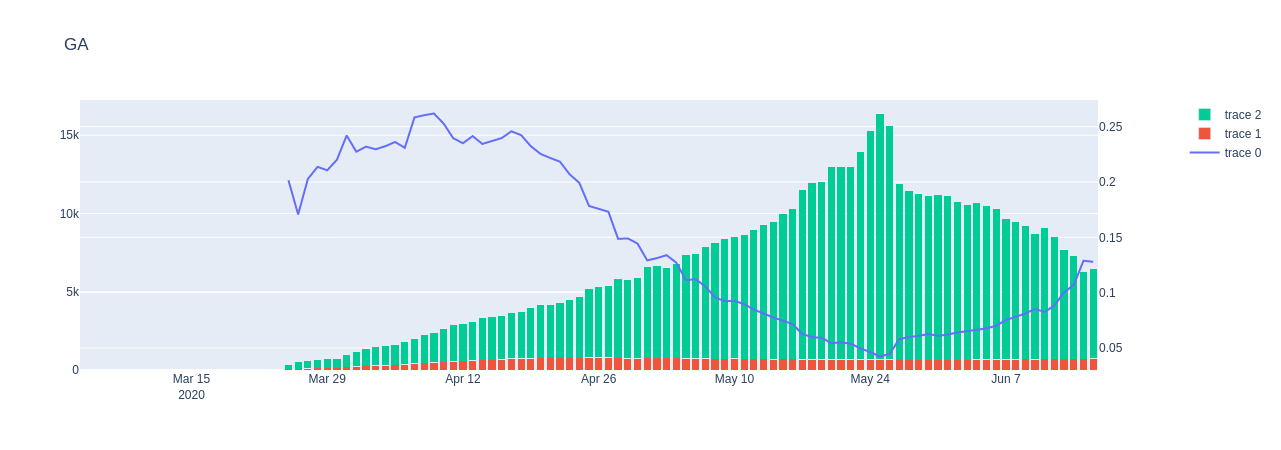

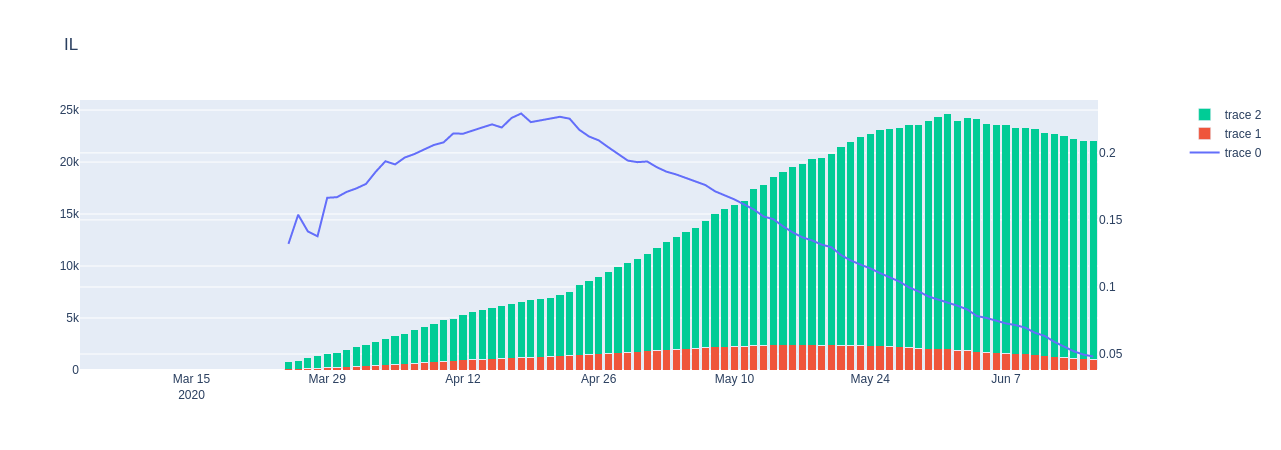

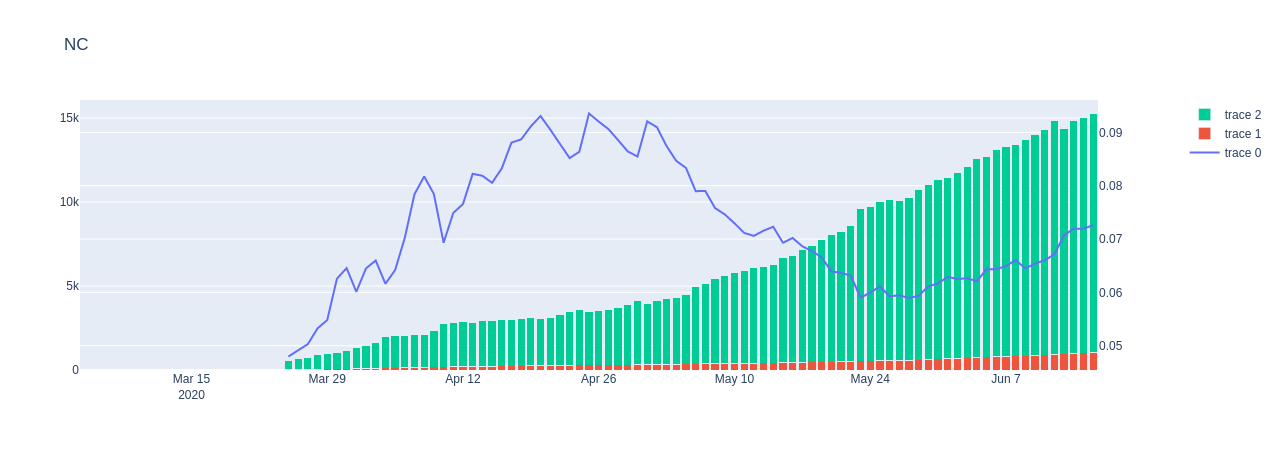

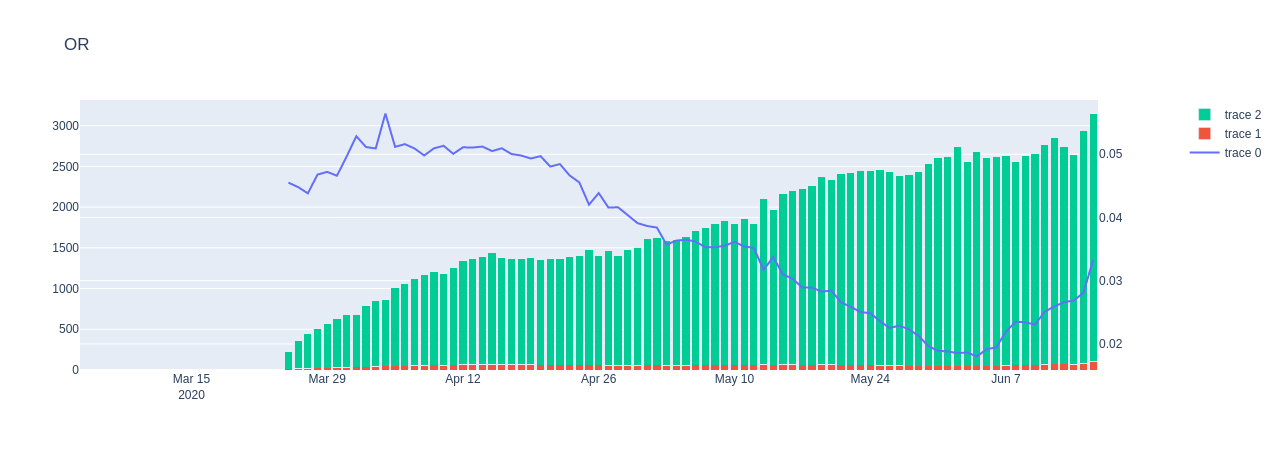

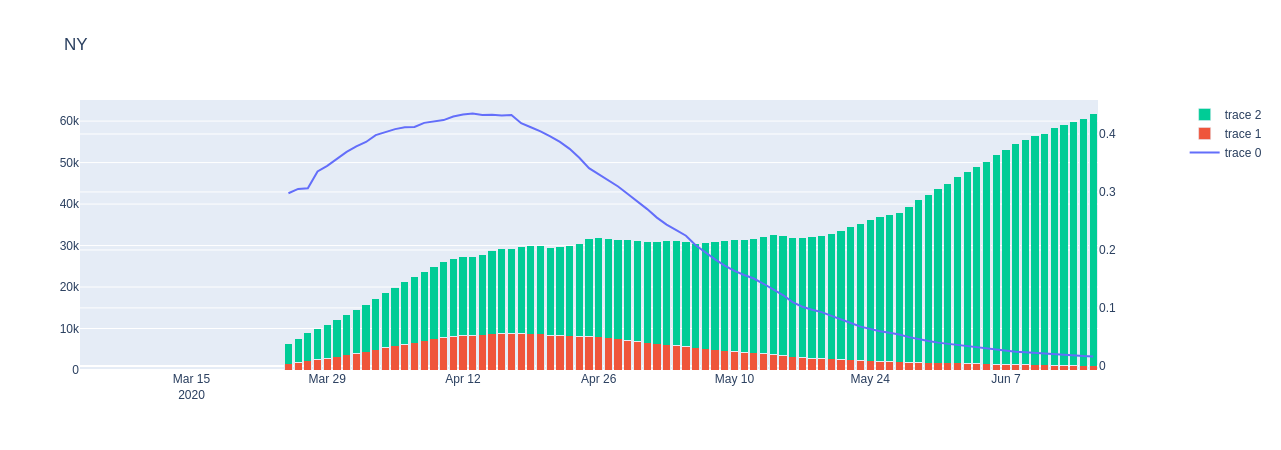

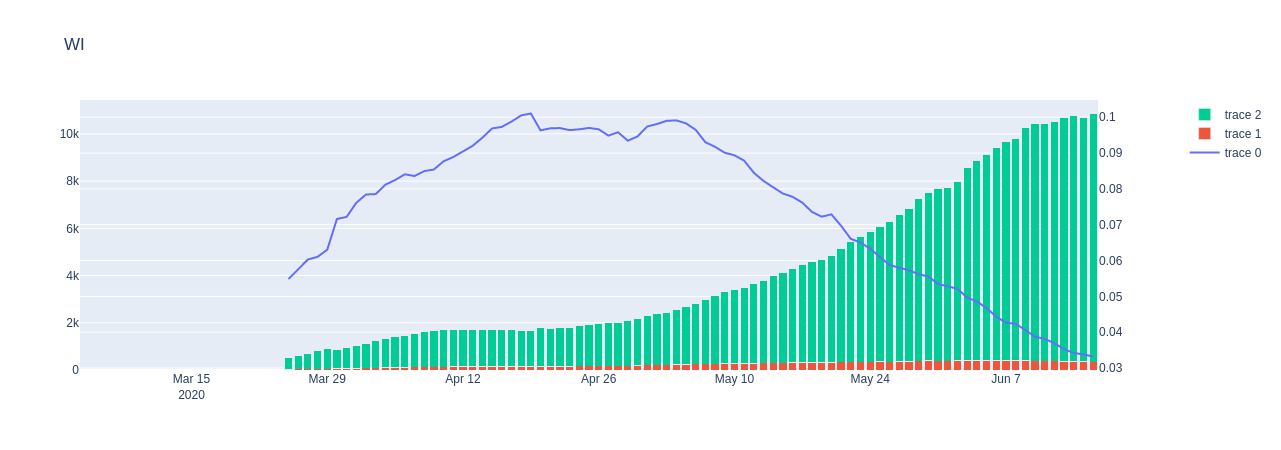

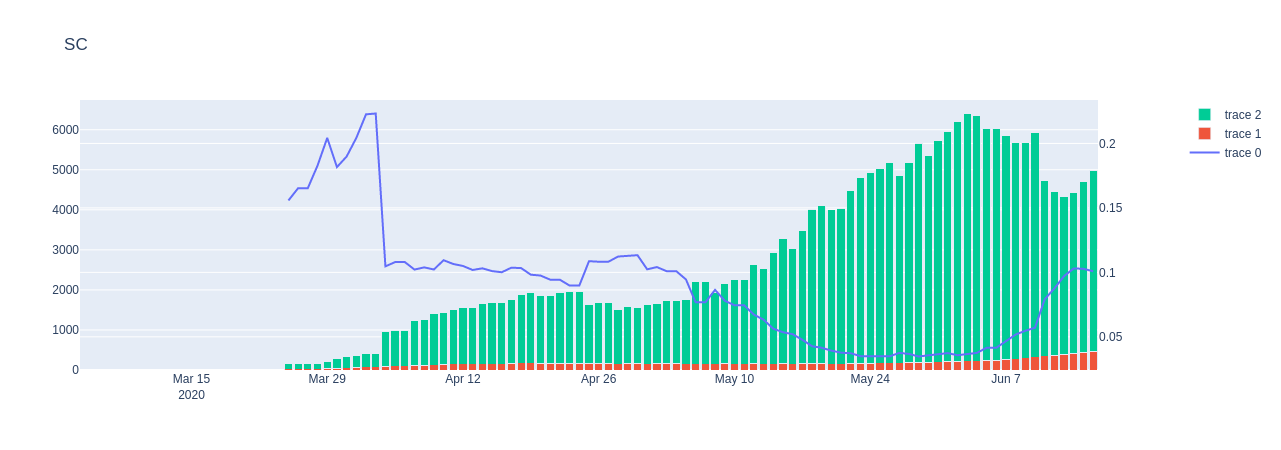

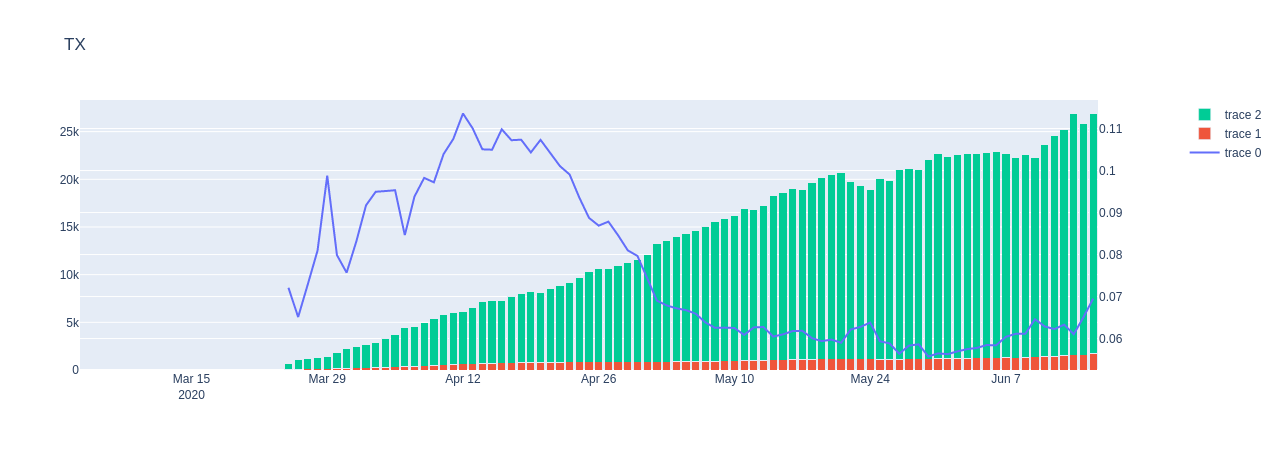

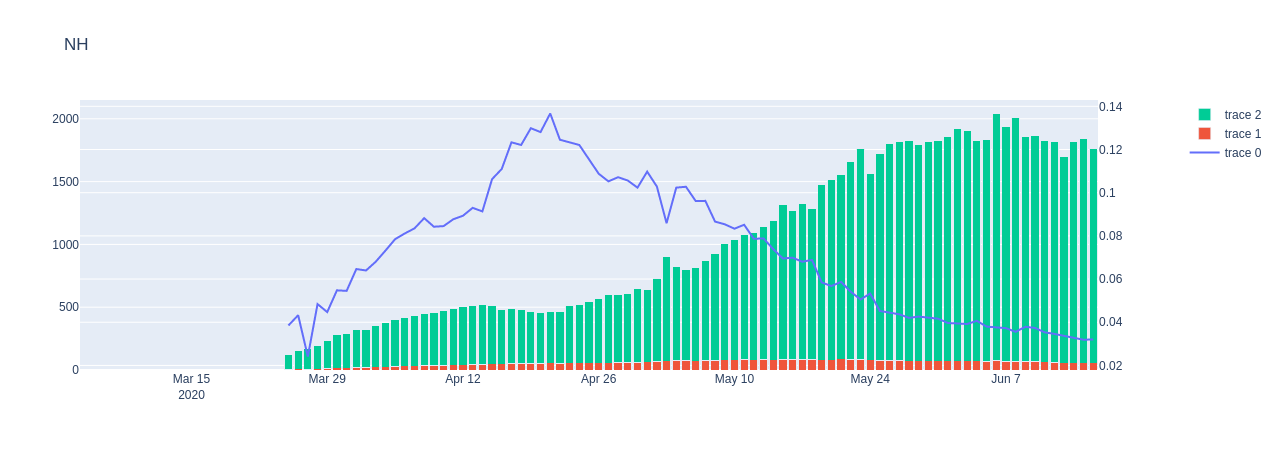

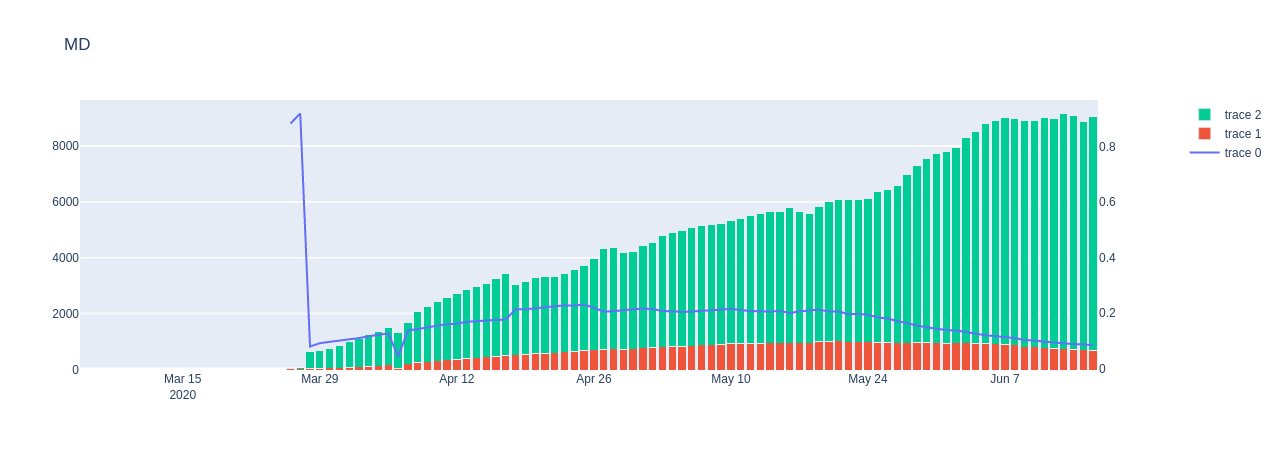

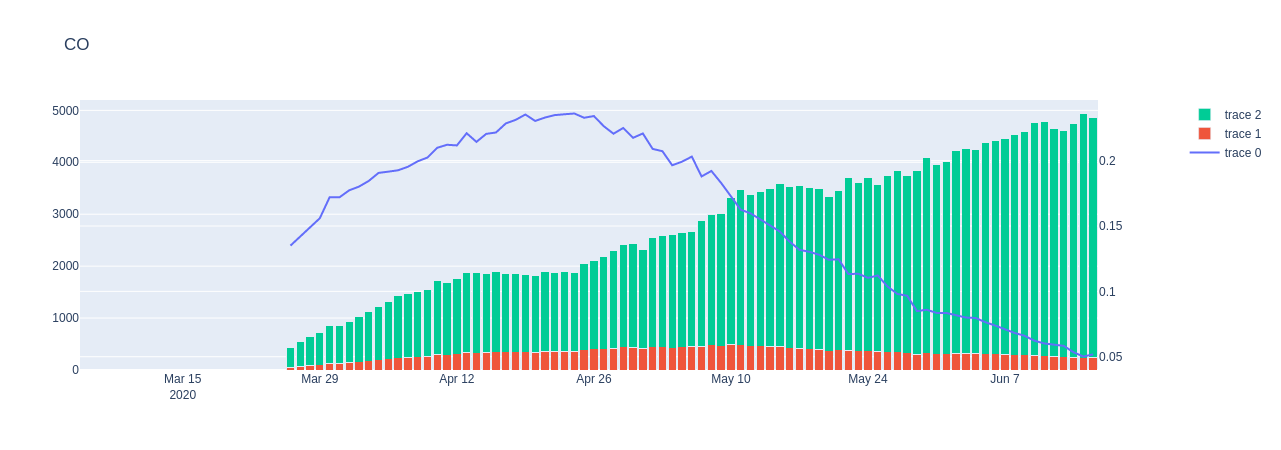

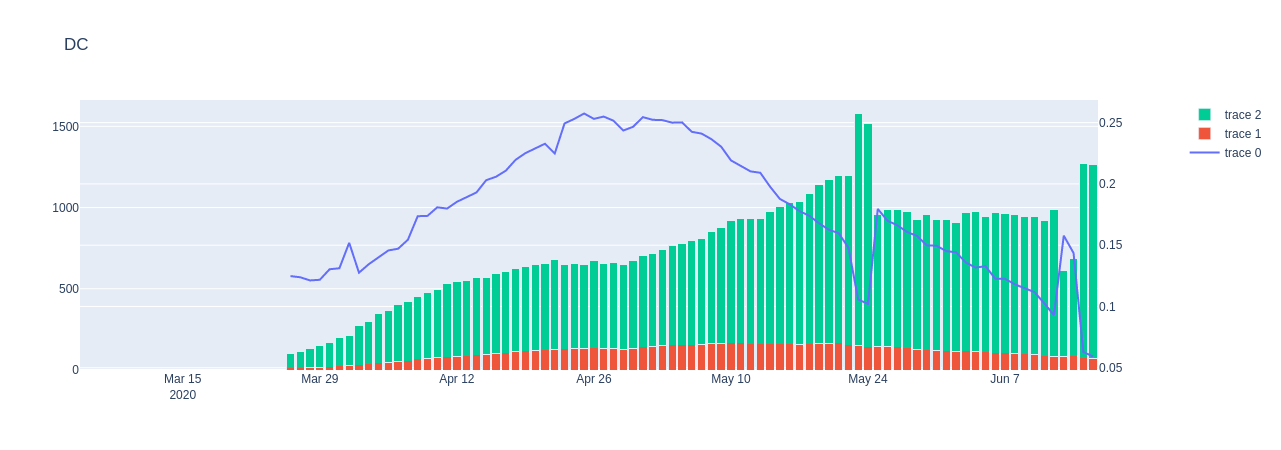

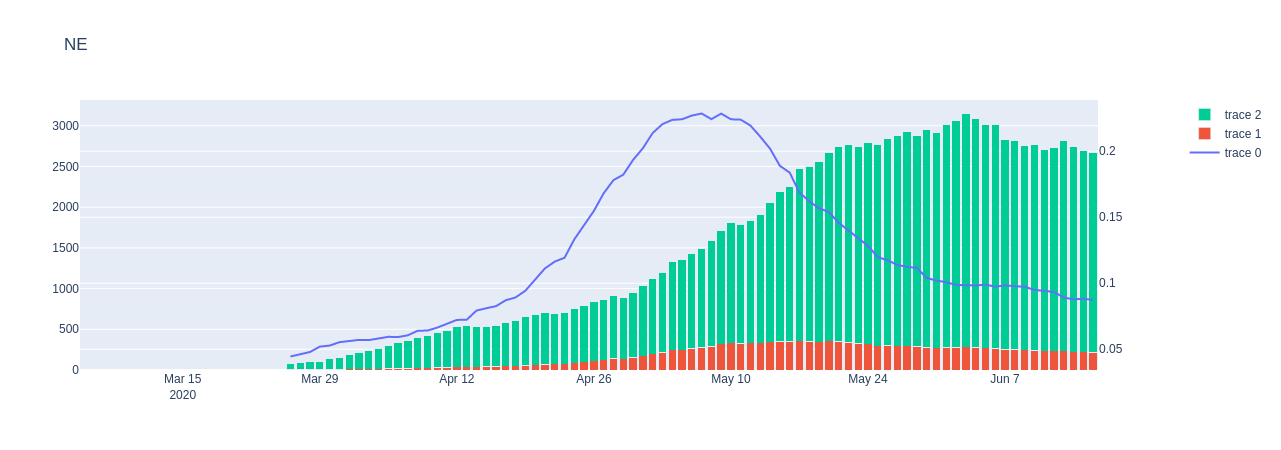

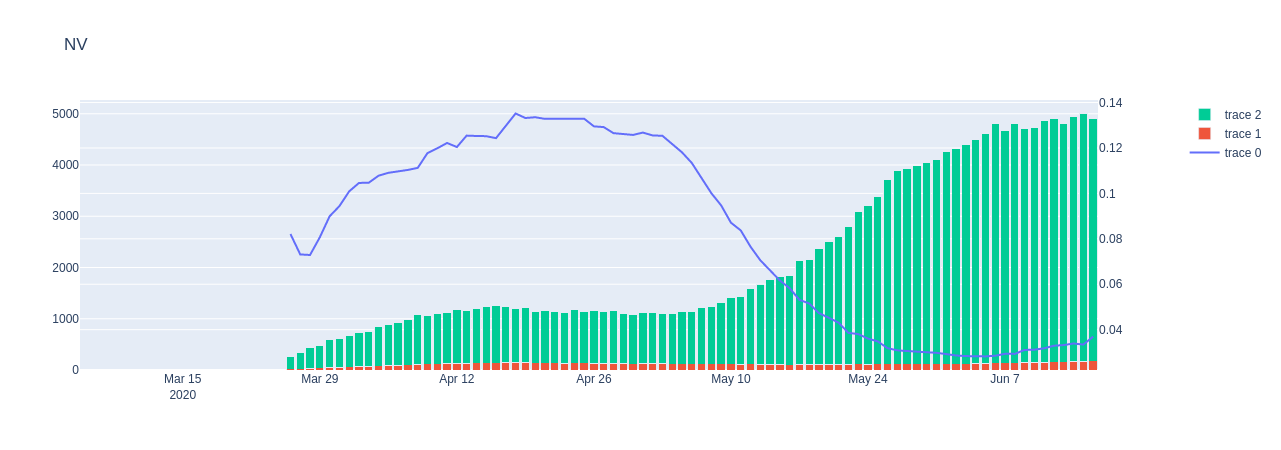

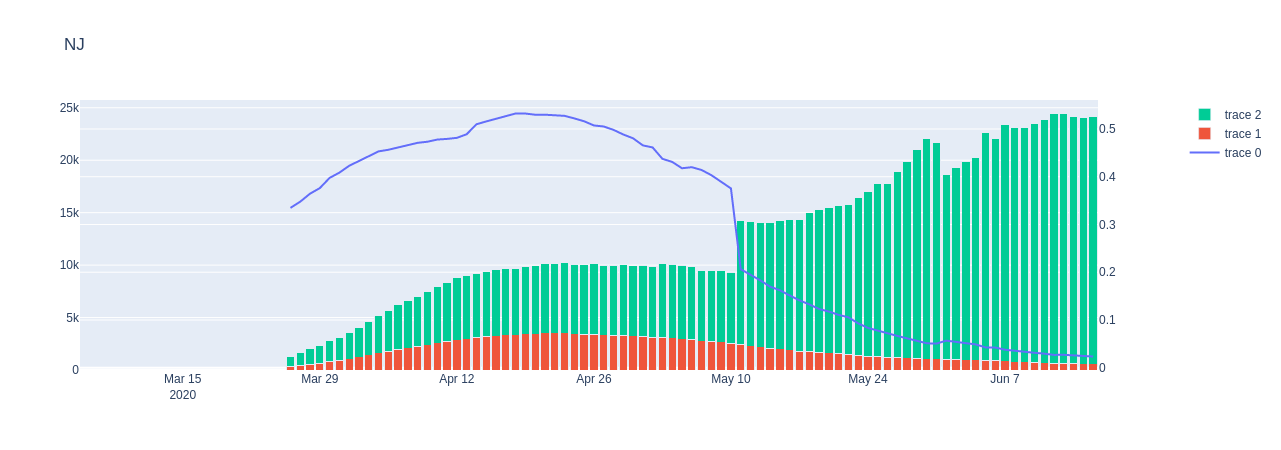

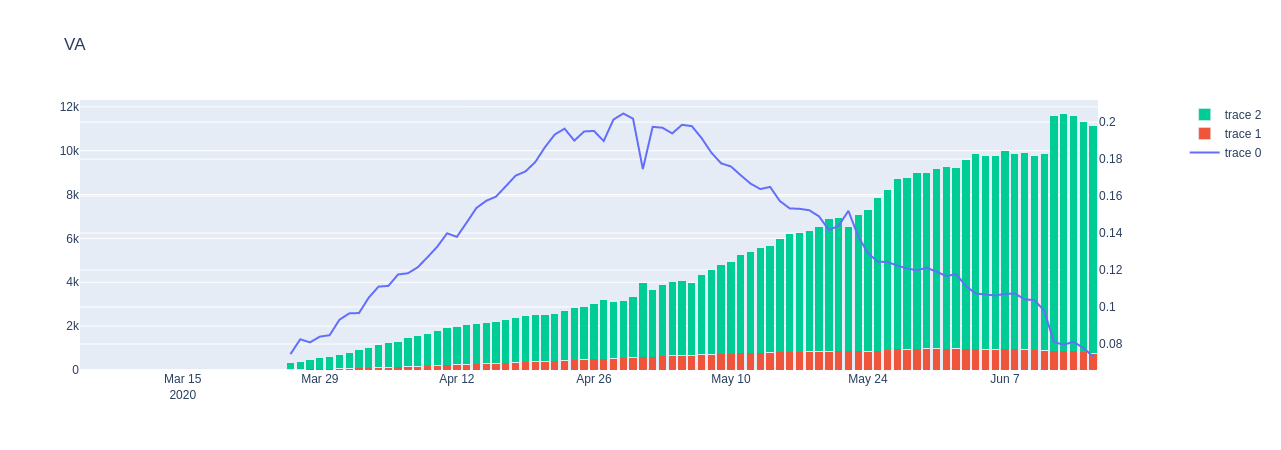

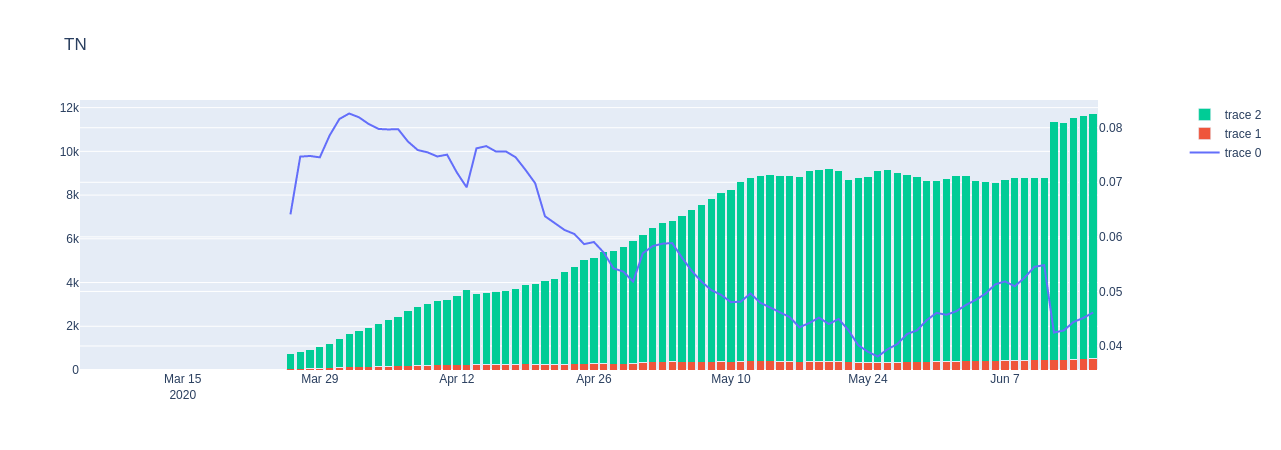

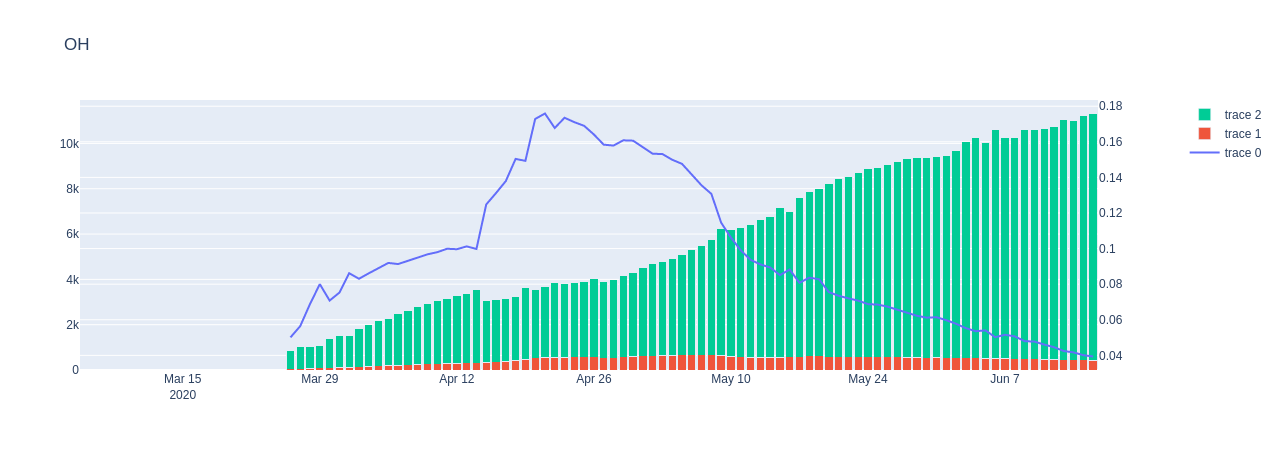

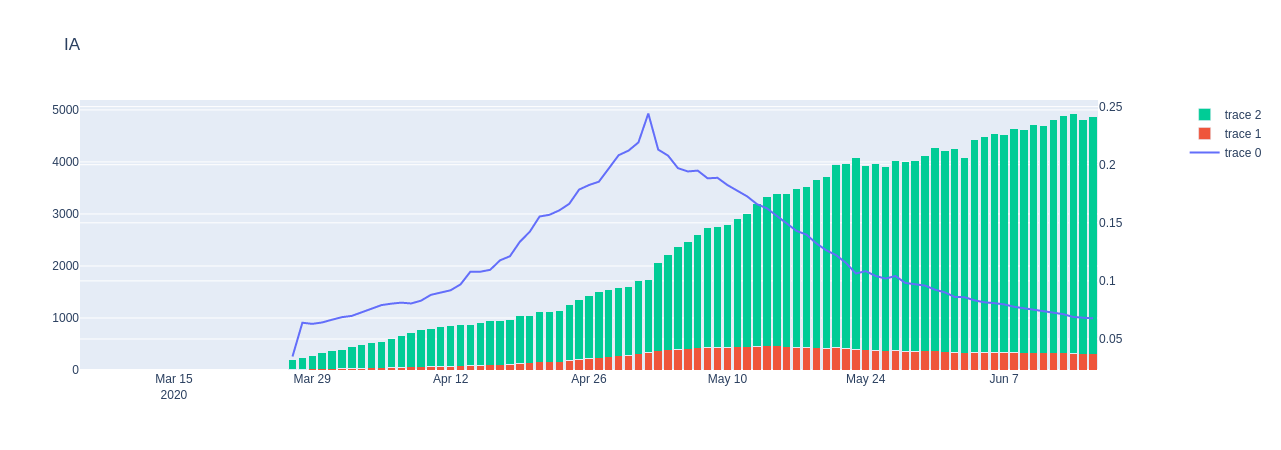

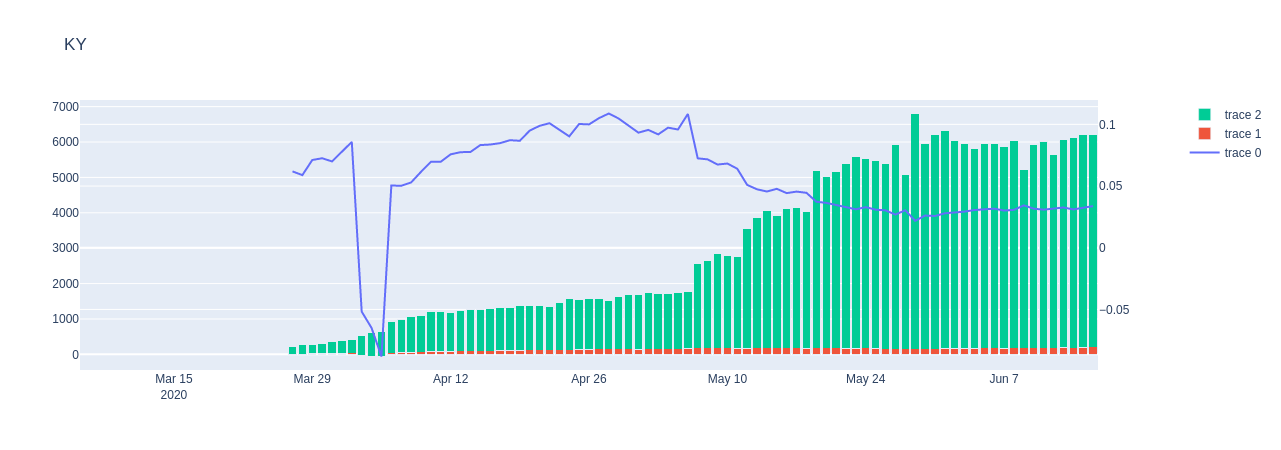

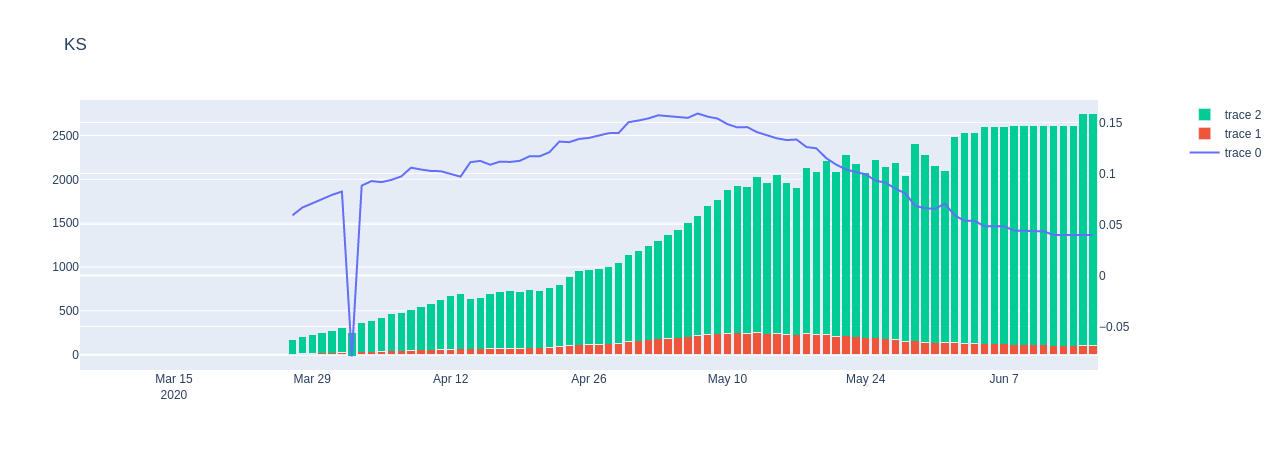

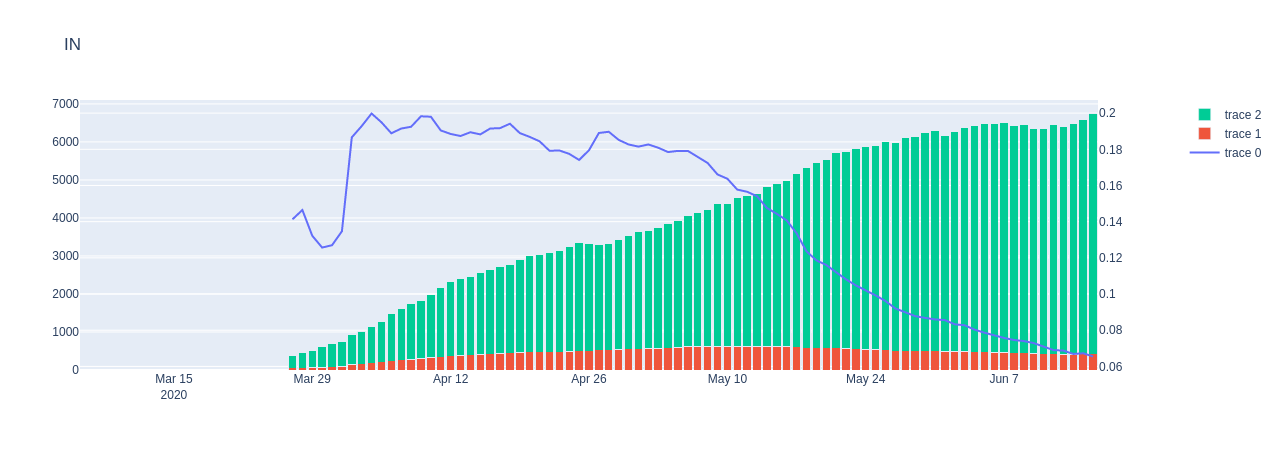

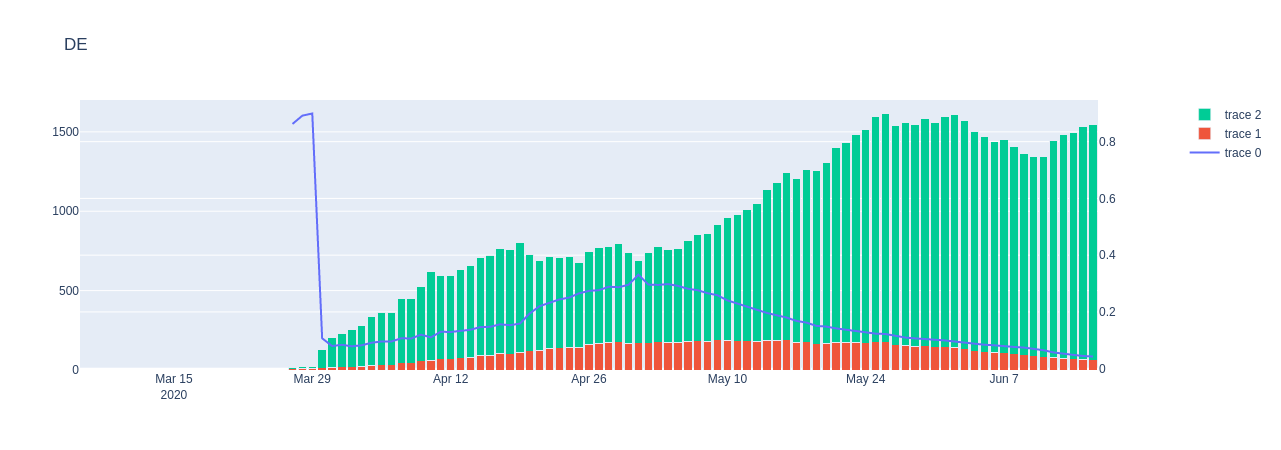

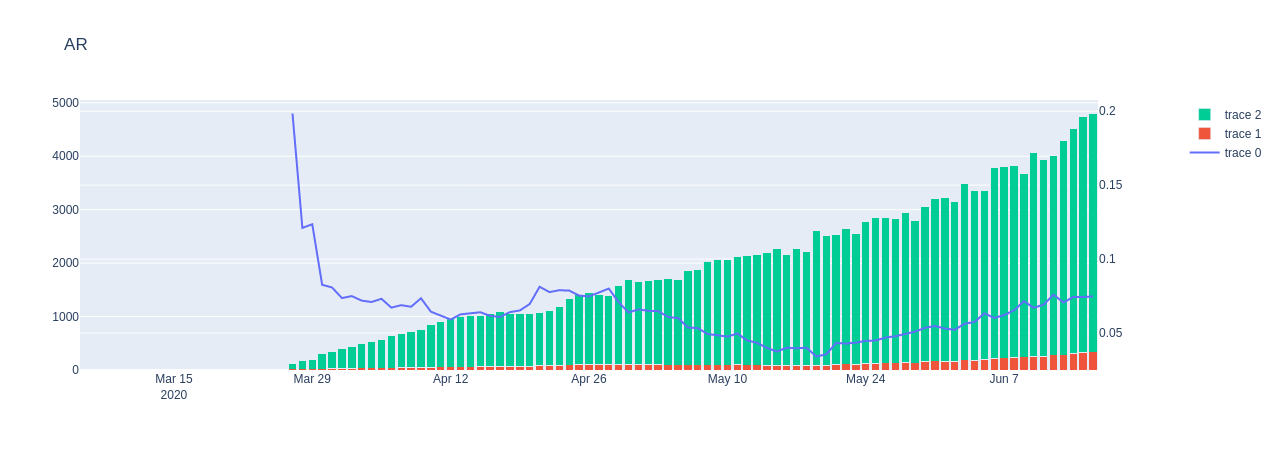

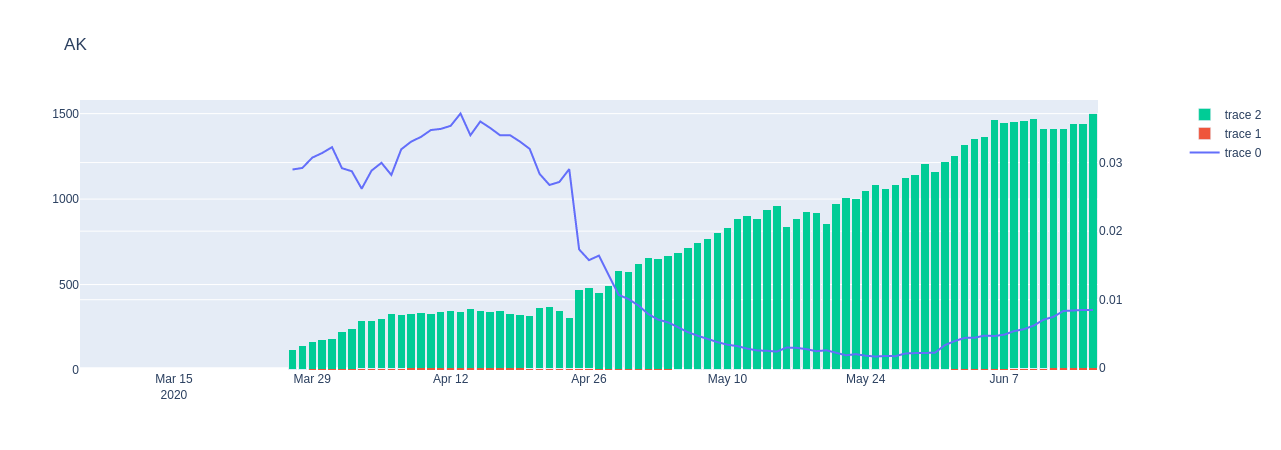

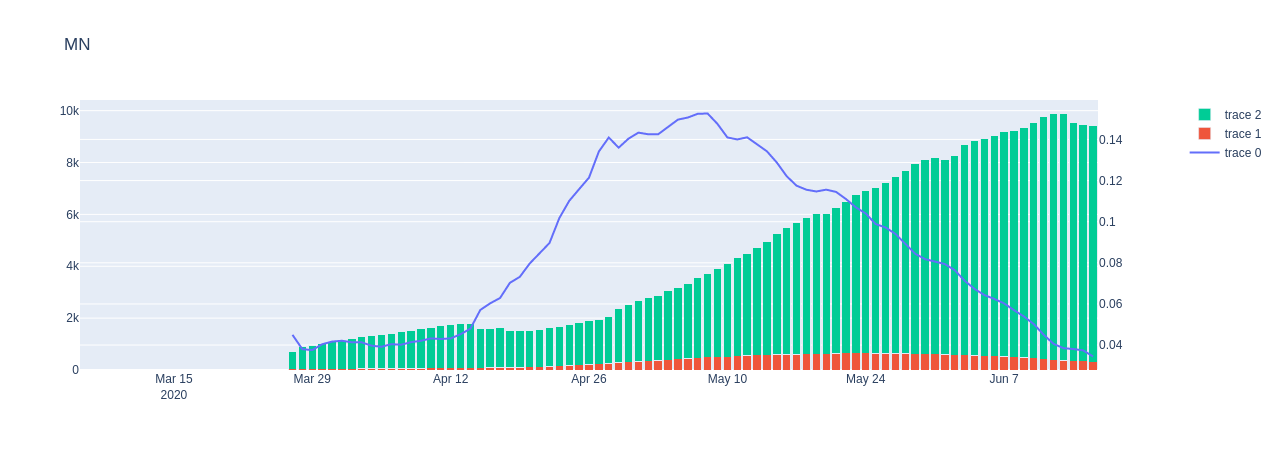

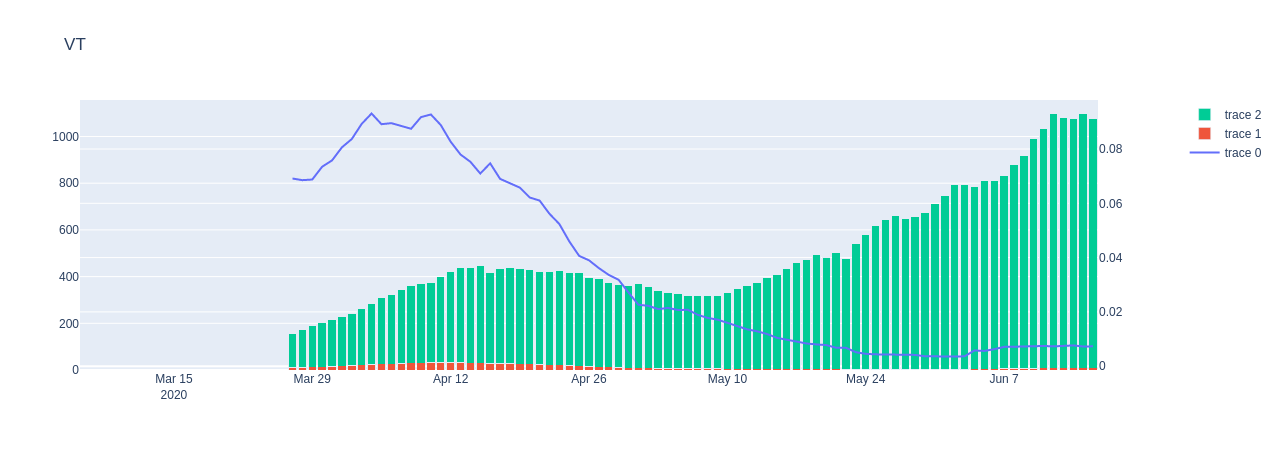

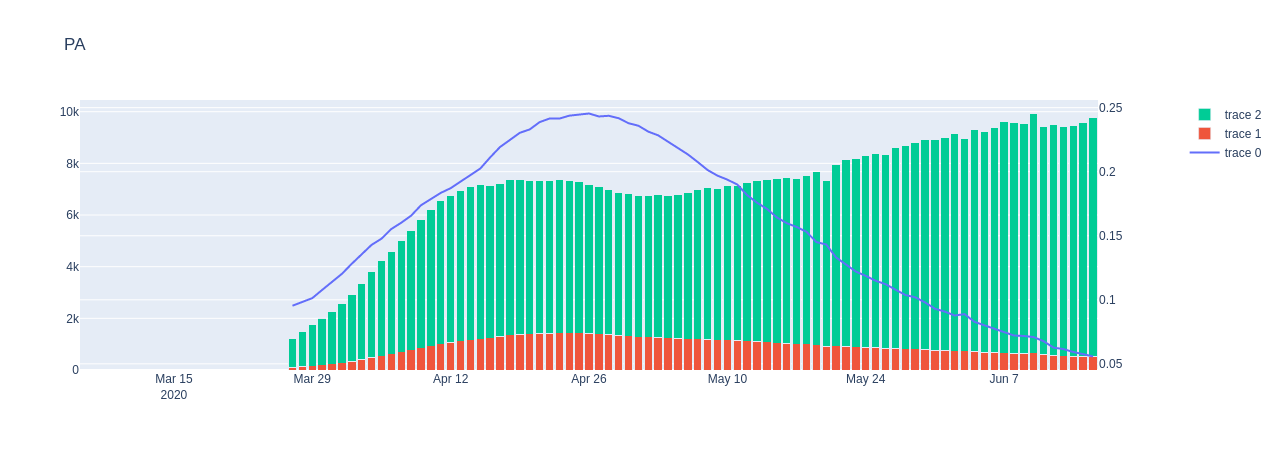

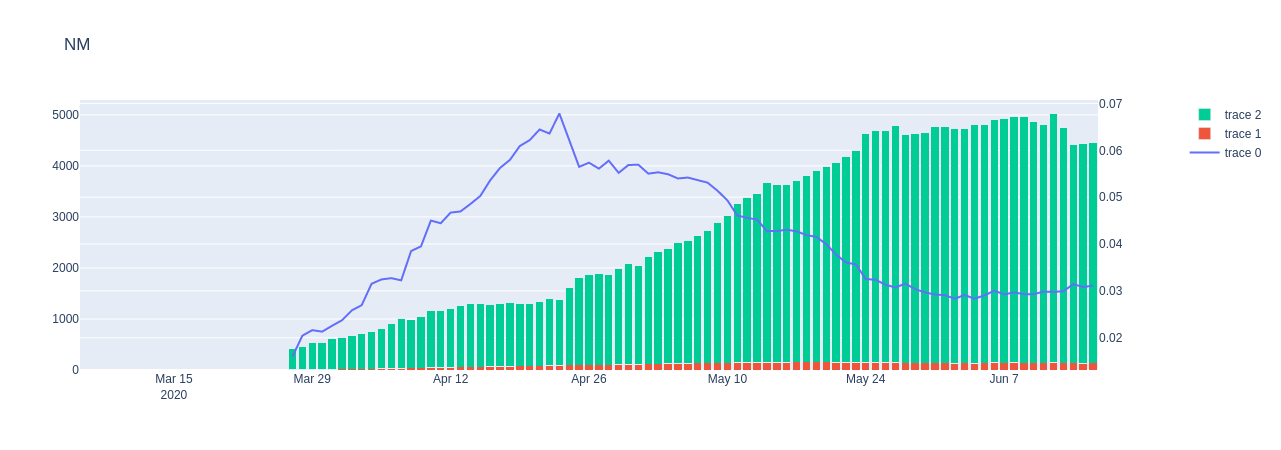

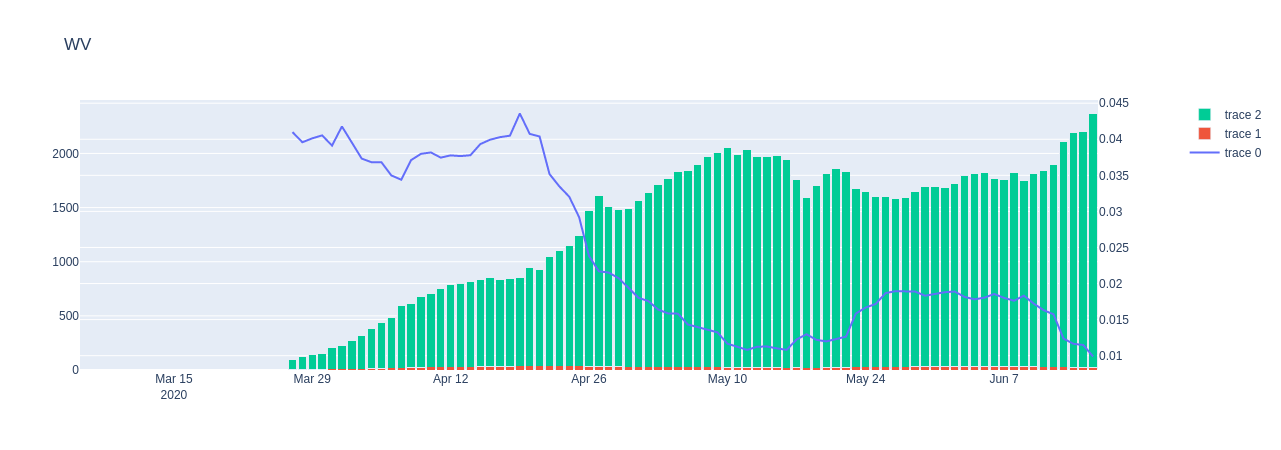

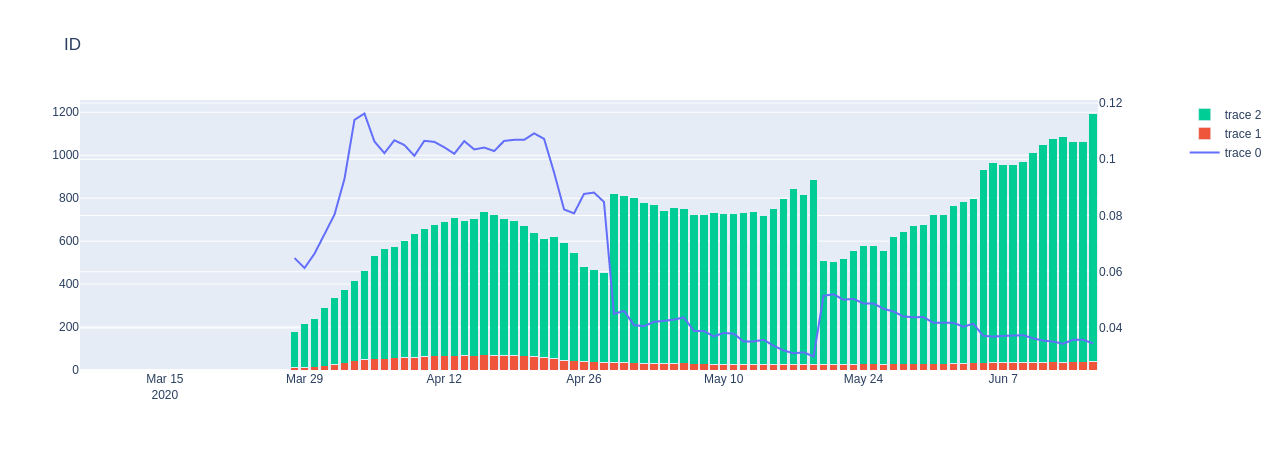

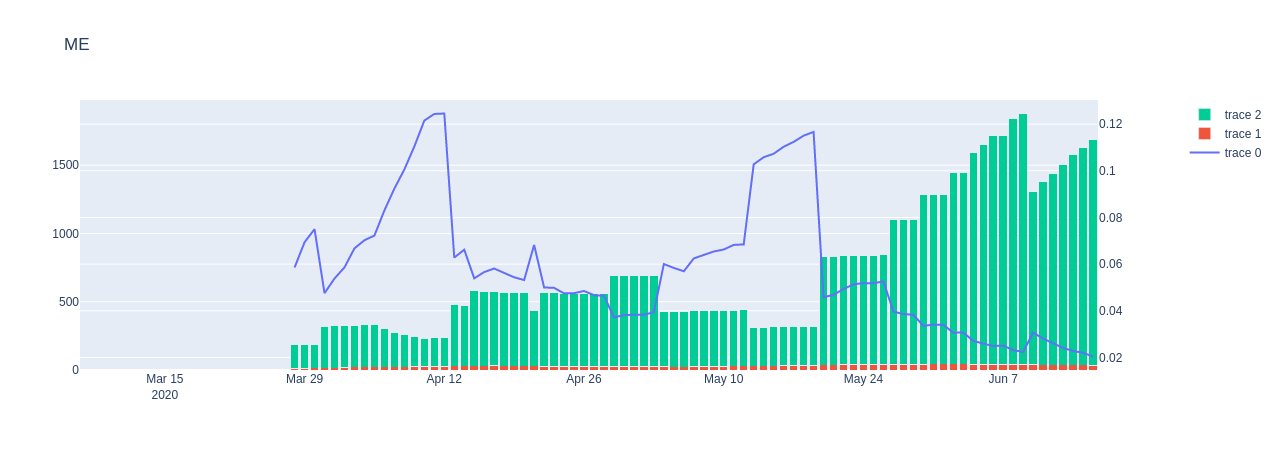

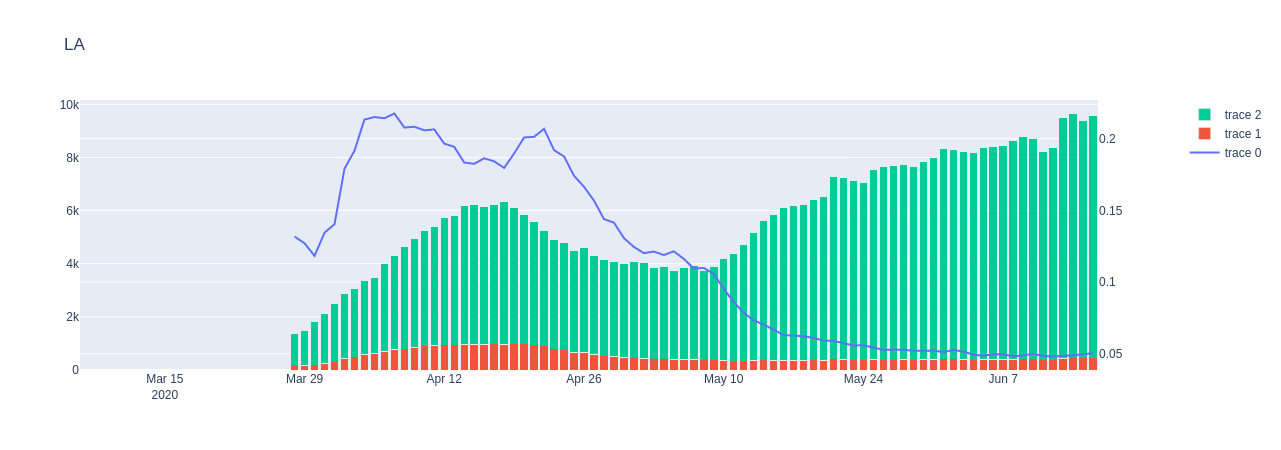

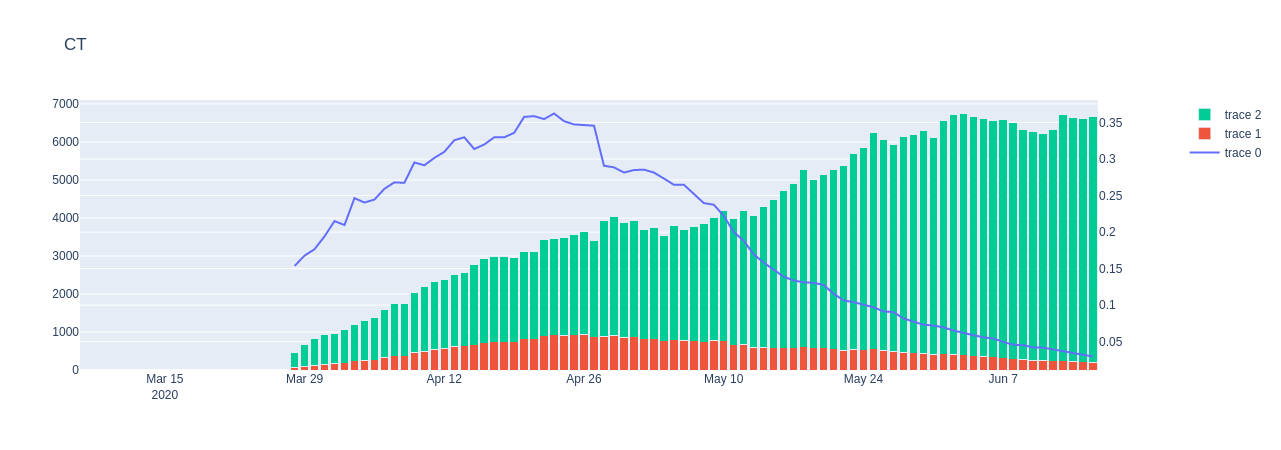

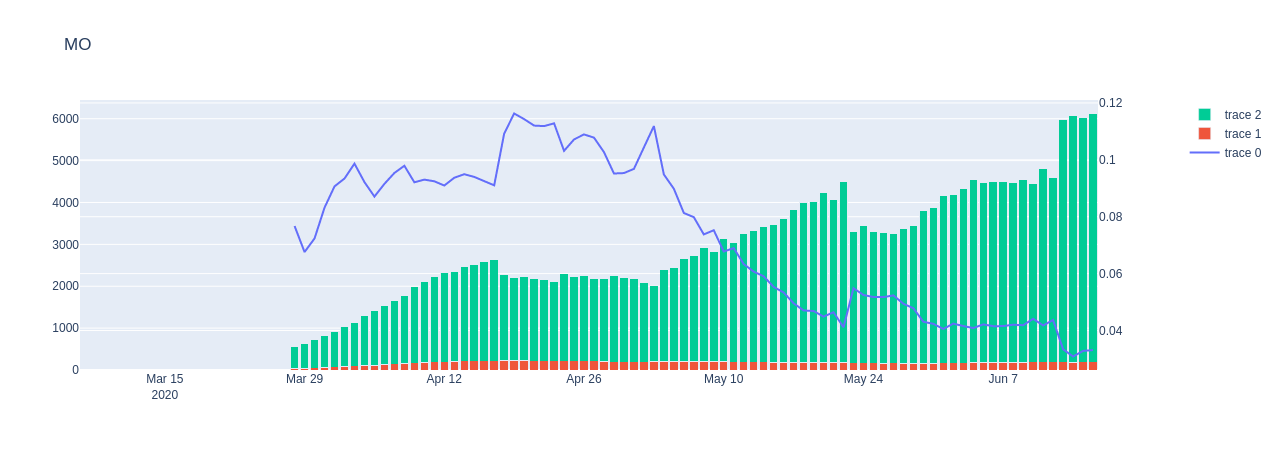

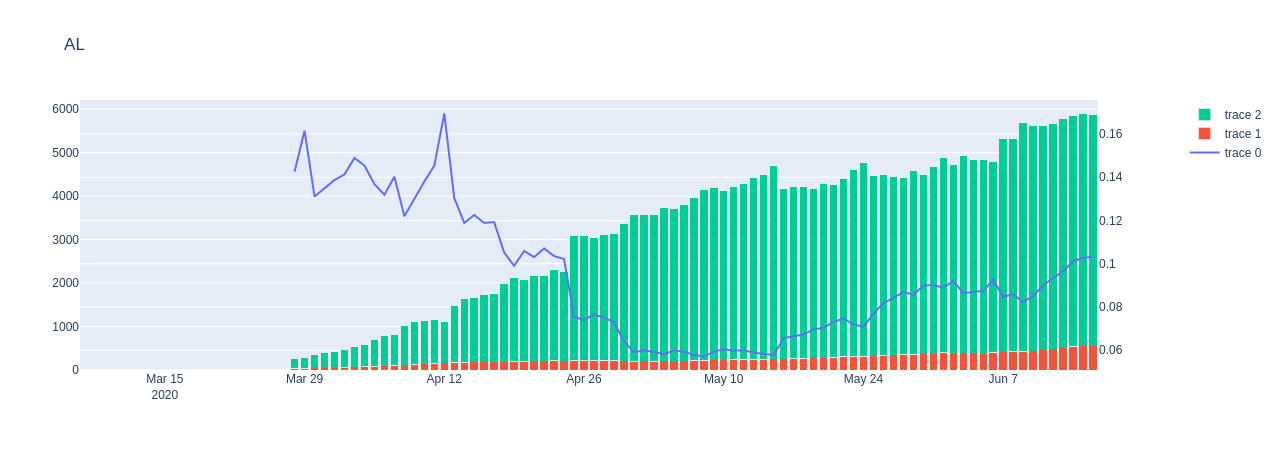

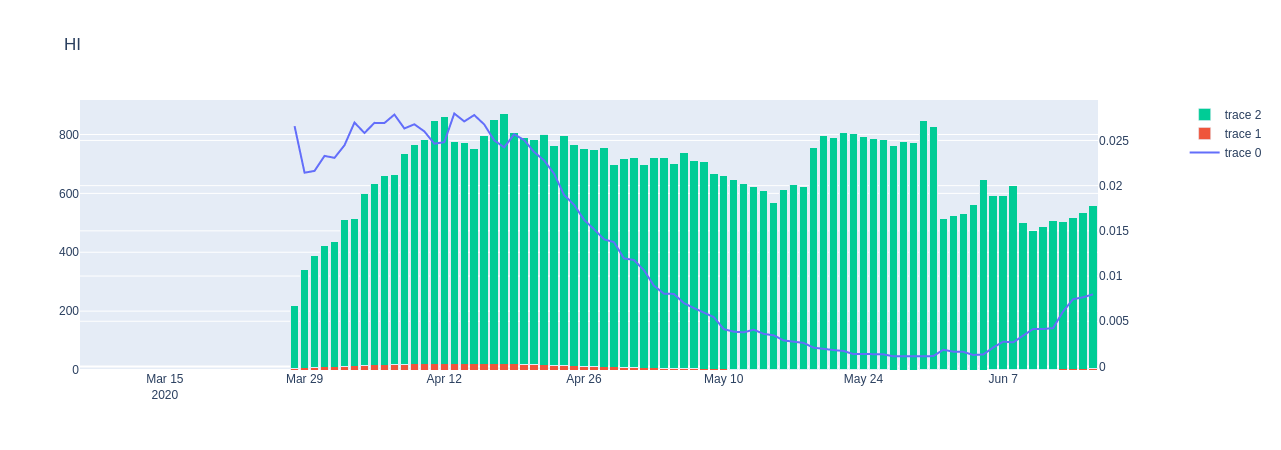

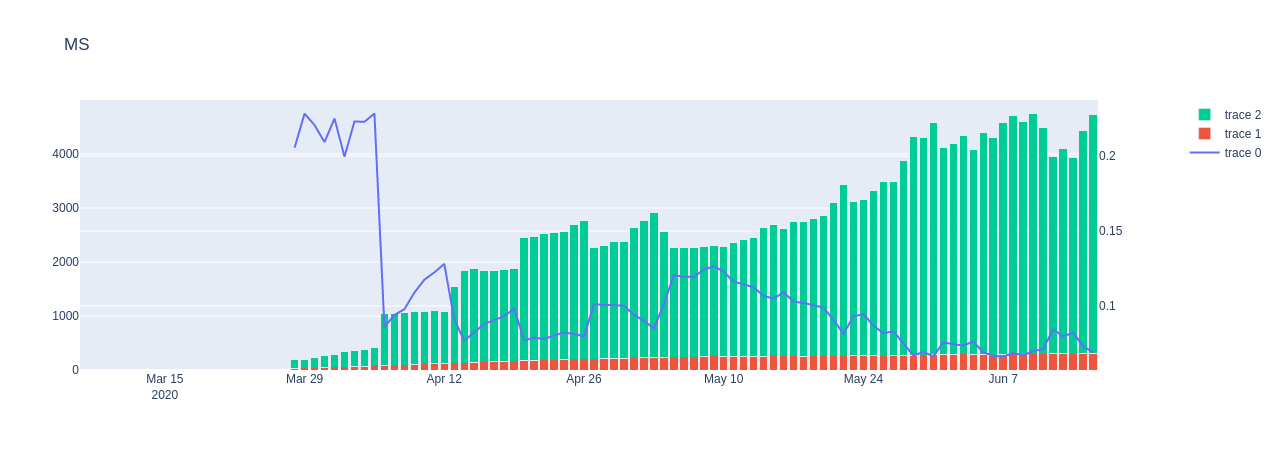

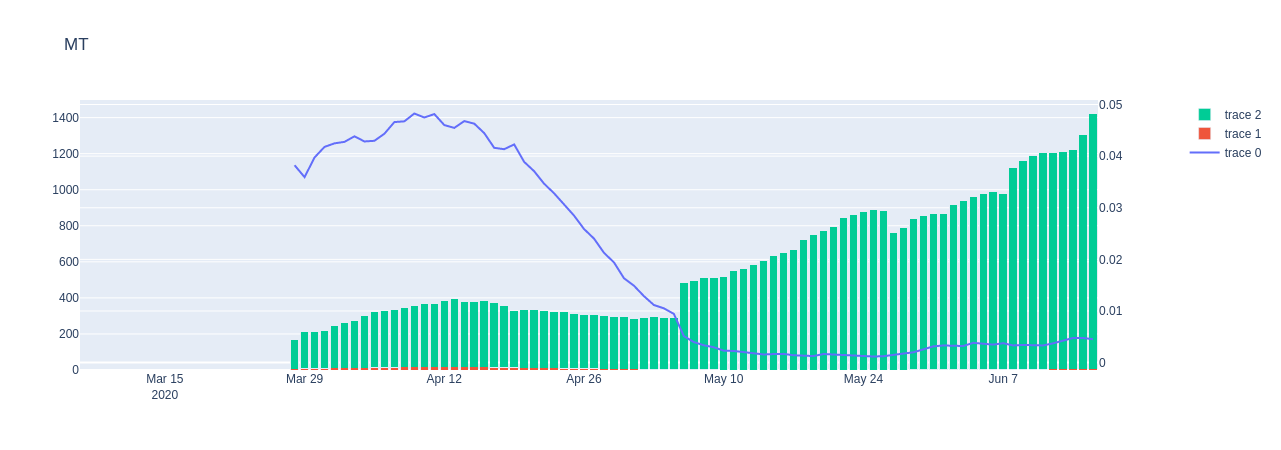

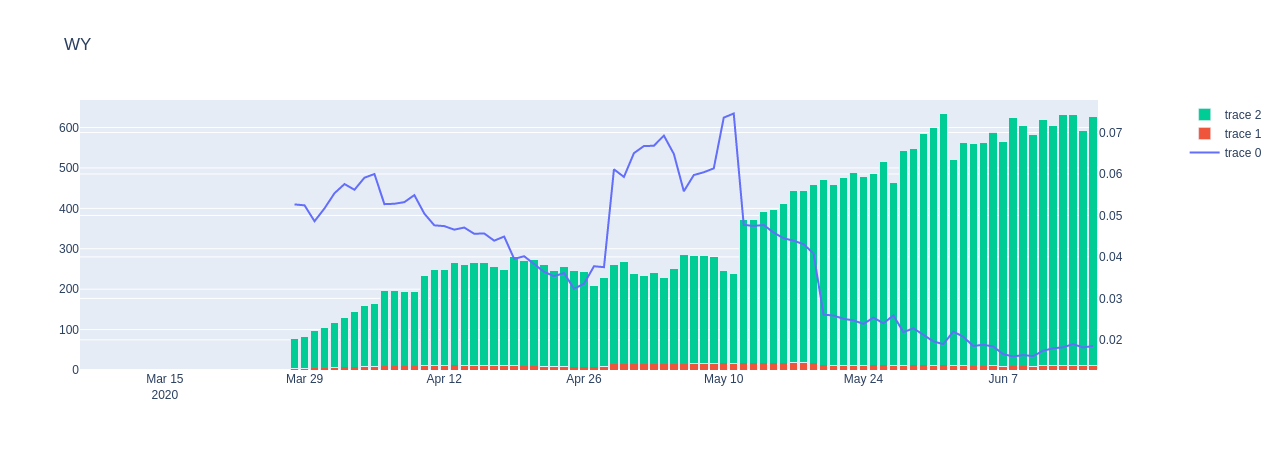

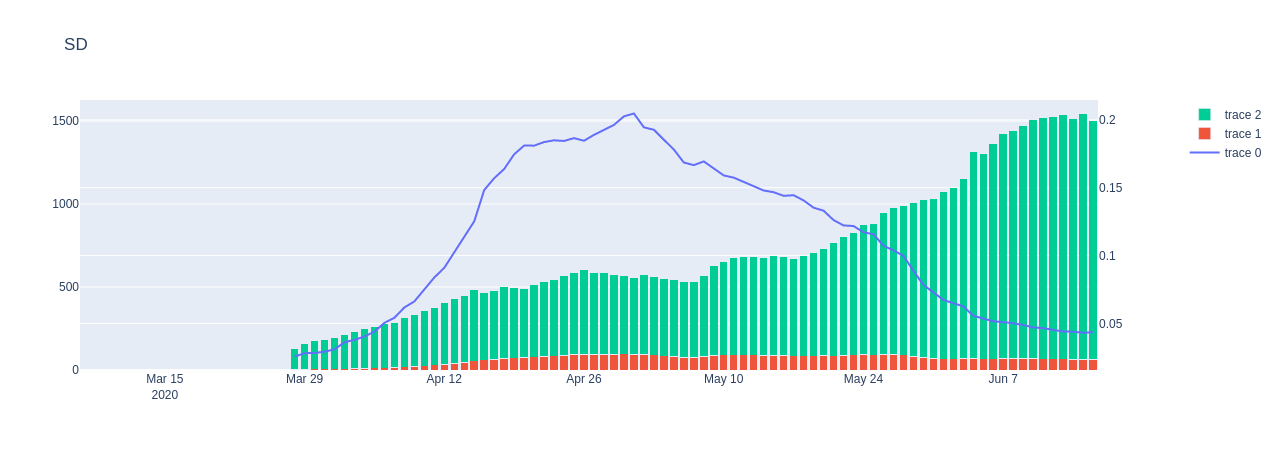

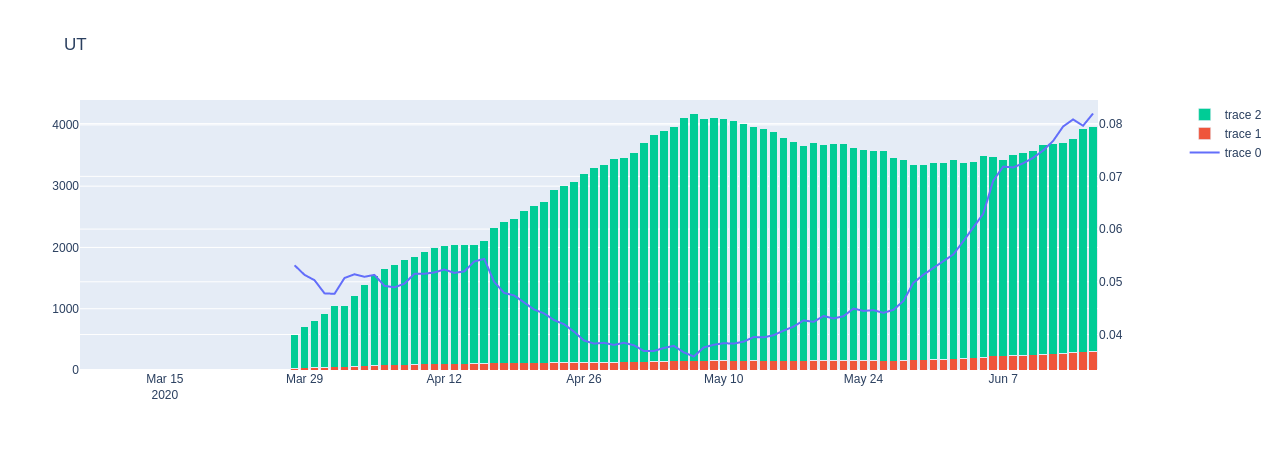

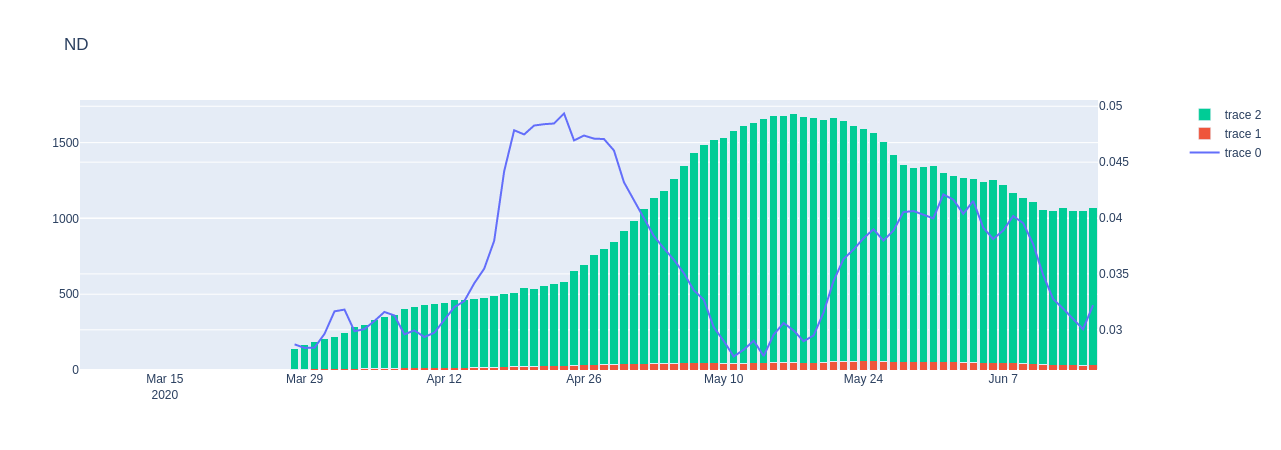

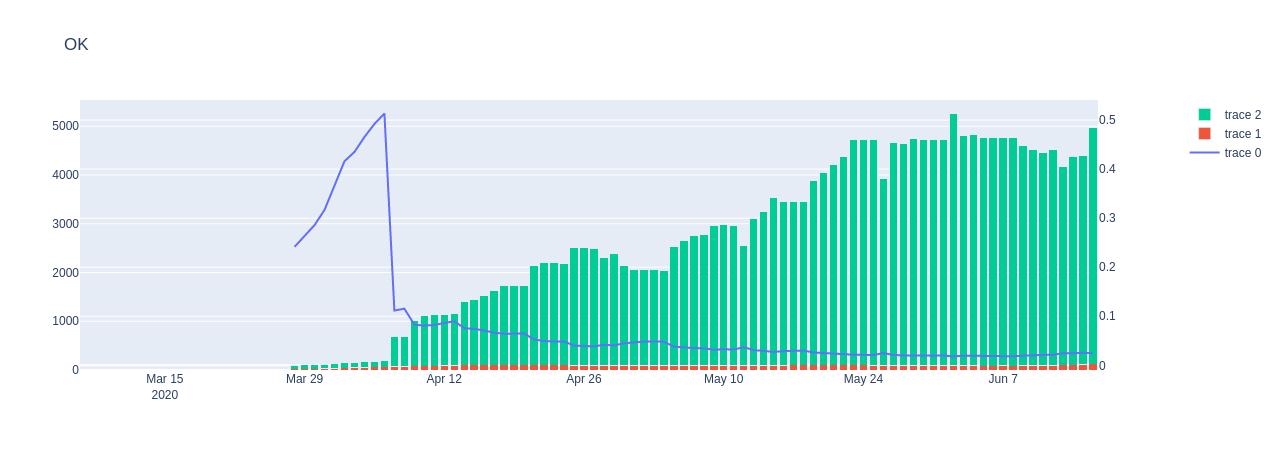

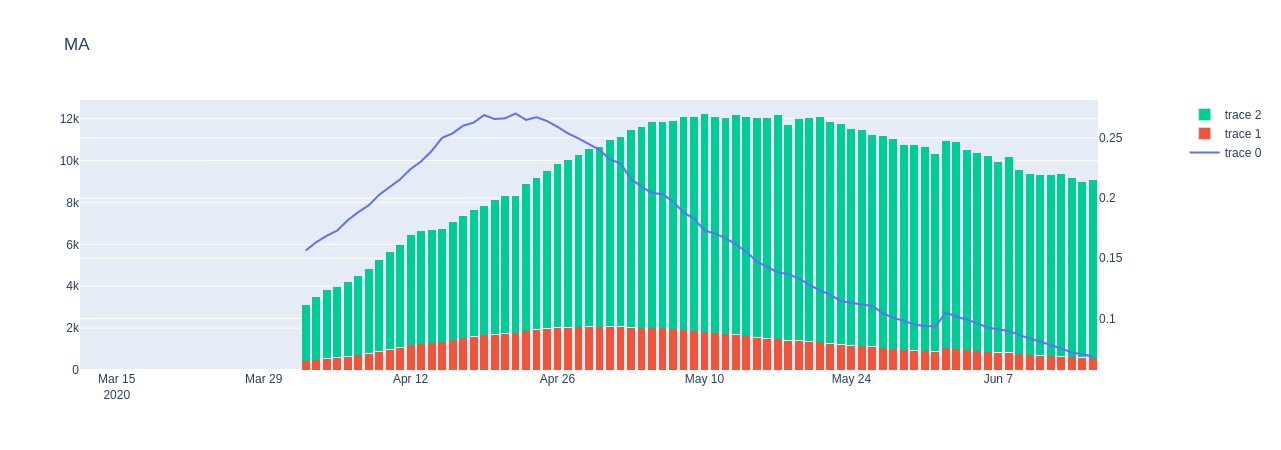

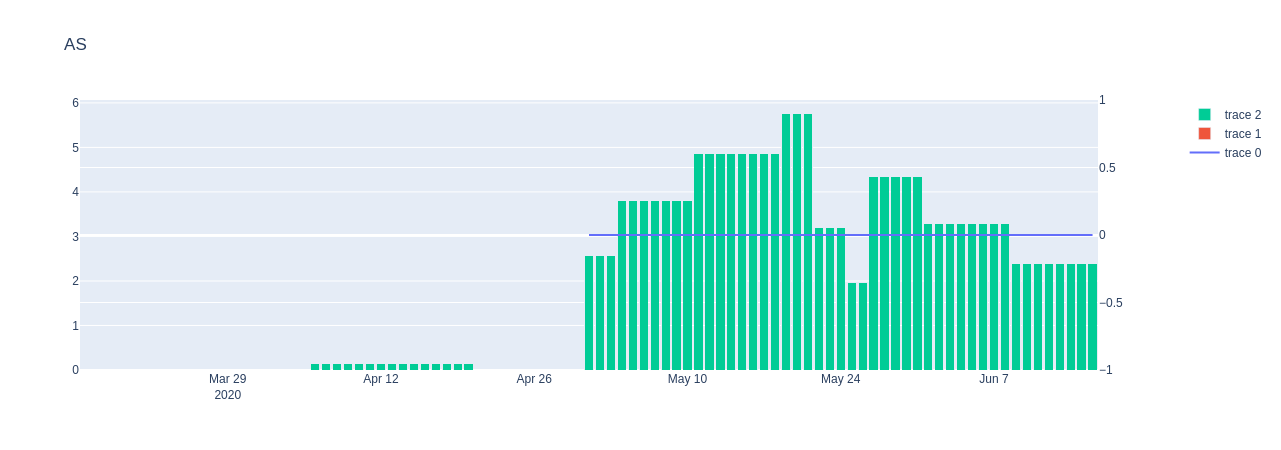

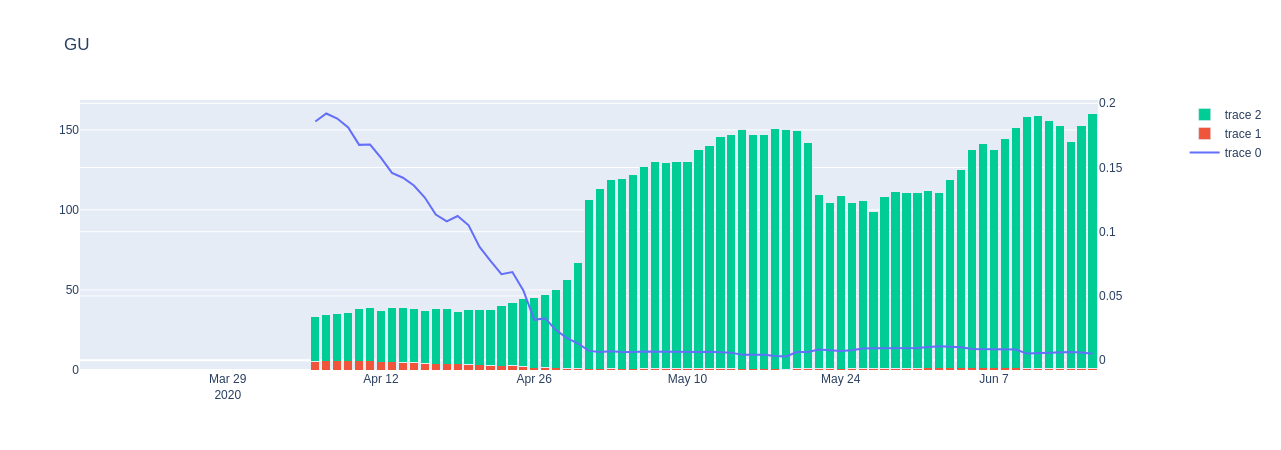

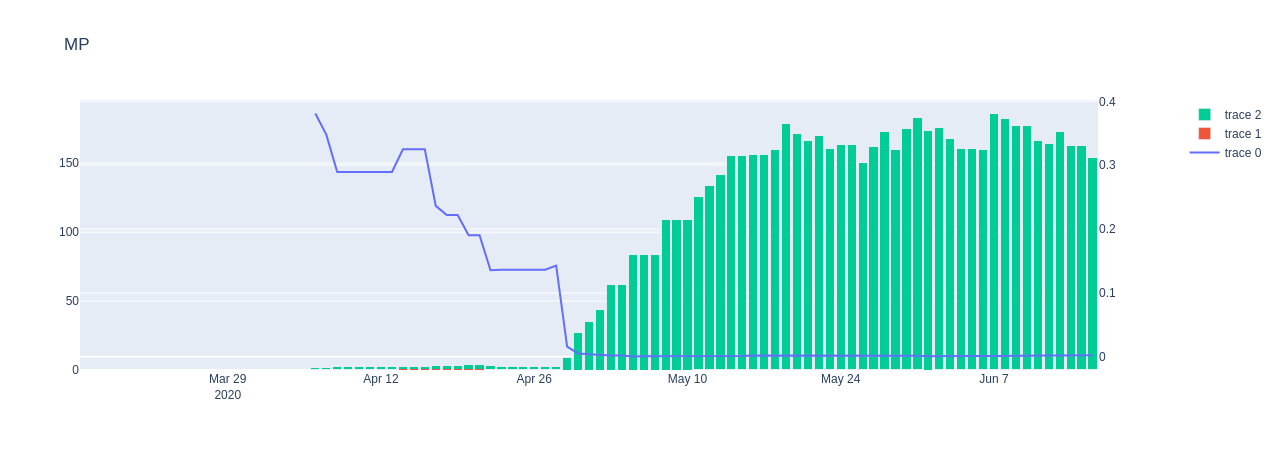

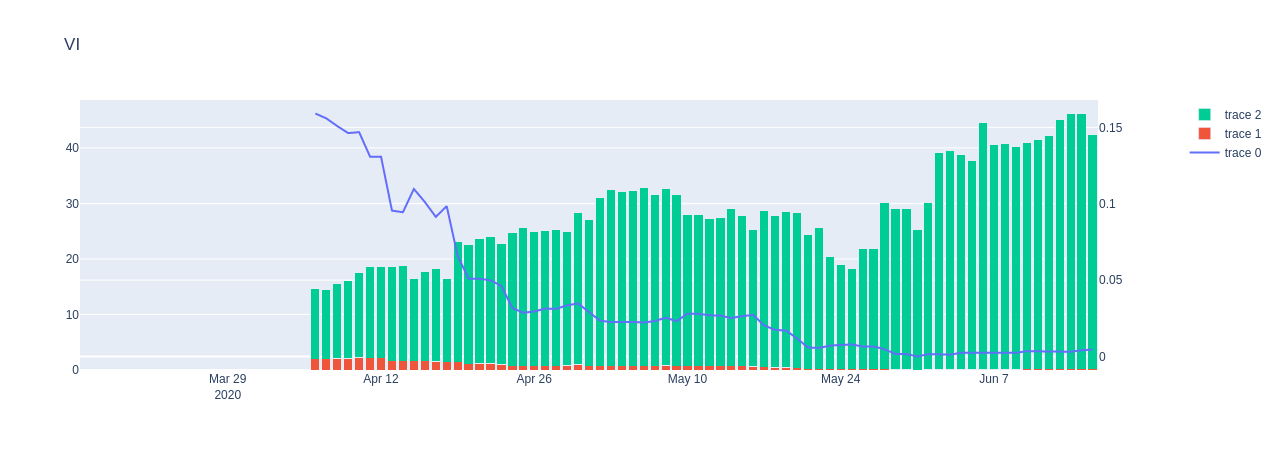

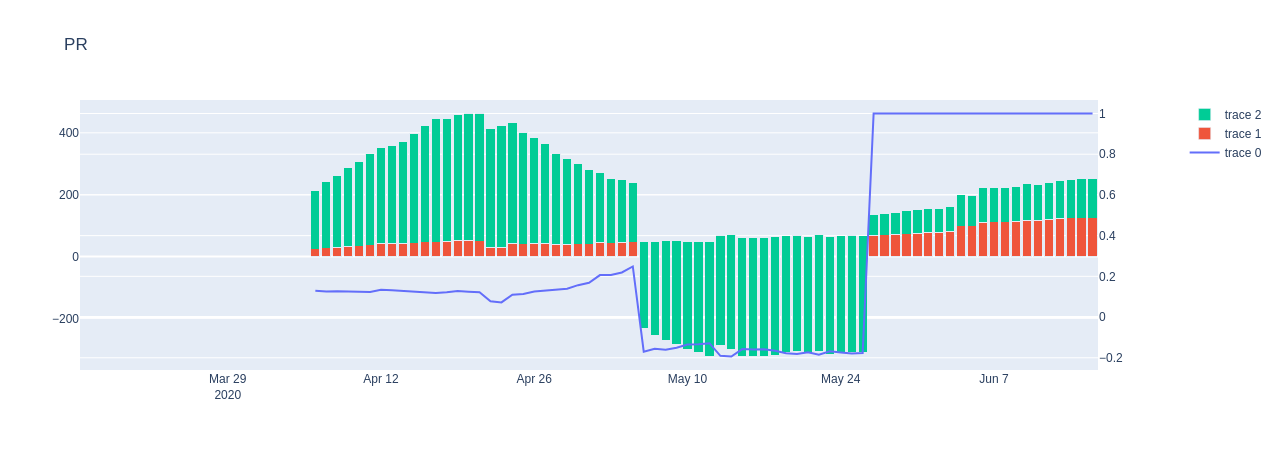

In [99]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

for state in df.state.unique():
    
    if state in df.state.unique():
        tmp = df[df.state==state]
        tmp['deltapos'] = tmp.positive.diff()
        tmp['deltapos.rolling'] = tmp.deltapos.rolling(21).mean()
        tmp['deltatest'] = tmp.totalTestResults.diff()
        tmp['deltatest.rolling'] = tmp.deltatest.rolling(21).mean()
        fig.add_trace(
            go.Scatter(x = tmp.date, y = tmp['deltapos.rolling']/tmp['deltatest.rolling']),
            secondary_y = True
            )
        fig.add_trace(
            go.Bar(x = tmp.date, y = tmp['deltapos.rolling']),
            secondary_y = False
            )
        fig.add_trace(
            go.Bar(x = tmp.date, y = tmp['deltatest.rolling']),
            secondary_y = False
            )
#fig.update_yaxes(type="log")
        fig.update_layout(title = state,barmode = 'stack',
        #    autosize=False,
        #    width=1000,
        #    height=1000
        )
        fig.show()